<div style="padding: 95px;color:white;margin:10;border-radius:8px;overflow:hidden;background-image: url(https://images5.alphacoders.com/714/714862.jpg);background-position: 50% 40%"></div>

<p style="padding-bottom: 10px;
          margin-bottom: 10px;
          font-size: 50px;
          font-weight: bold;
          color: black; 
          text-align: left;
          font-family: Poppins"><b>🍷 Wine Quality: EDA, Prediction and Deploy</b>
<p style="font-size: 22px; color: gray; text-align: left;">From grape to glass: Leveraging data science to explore wine quality and build a predictive model.</p>
<hr style="height:2px;border-width:0;color:gray;background-color:gray;box-shadow: 0px 2.5px 5px rgba(0, 0, 0, 0.2);">

<h3 style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 16px;
            font-weight: bold;
            color: black;">Table of Contents</h3>
    
- [Introduction](#intro)<br><br>
- [Exploratory Data Analysis](#eda)<br><br>
- [Feature Engineering](#eng)<br><br>
- [Feature Selection](#select)<br><br>
- [Clustering](#cluster)<br><br>
- [Modelling](#model)<br><br>
- [Deploying Pipeline](#deploy)<br><br>
- [Conclusion](#conclusion)<br><br>

<h1 id = 'intro' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 38px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Introduction</h1>

<p style="font-size: 20px">Wine, an alcoholic beverage renowned for its sophistication and diverse in flavors, has enchanted humanity for centuries! In this notebook, we will delve into a dataset consisting of many wines and explore what influence their quality. Through the performing of an extensive exploratory data analysis, our goal is to gain insights into the world of wines to develop a <i>machine learning</i> model that is capable of accurately predicting wine quality.
<br><br>
Multiple factors contribute to the overall quality of a wine. While taste is subjective, there are other key elements that are widely recognized as indicators of quality. These factors include acidity, residual sugar, alcohol content, and many more. Each of these attributes plays a crucial role in shaping the taste, aroma, and overall appeal of a wine.
<br><br>
Our journey begins with a meticulous exploratory analysis of the dataset. Through this analysis, we aim to extract meaningful insights and uncover relevant information by examining the relationships between different attributes within the data. We will investigate how each factor influences the quality of the wine and identify any patterns or correlations that may exist.
<br><br>
Once we have gained a comprehensive understanding of the data, we will proceed to build and evaluate various predictive models. Our objective is to develop a model that can accurately predict the quality of a wine based on its attributes.
<br><br>
In the following table, you can see the attributes we have at hand and a brief description on how important they may be to shape a wine's taste, aroma, and overall quality.</p>

<table style="font-family: Arial, sans-serif; font-size: 16px;">
  <tr>
    <th><b>Attribute</b></th>
    <th><b>Description</b></th>
  </tr>
  <tr>
    <td><b>Fixed Acidity</b></td>
    <td>This feature describes the amount of fixed acids within the wine, such as tartaric and malic acid. These contribute to the taste and preservation of the wine.</td>
  </tr>
  <tr>
    <td><b>Volatile Acidity</b></td>
    <td>This feature describes the amount of volatile acids in the wine, such as acetic acid. These acids may give an unpleasant taste and smell to the wine.</td>
  </tr>
  <tr>
    <td><b>Citric Acid</b></td>
    <td>Citric acid is an organiz acid found in citrus fruits. It can add a tangy flavor to the wine.</td>
  </tr>
  <tr>
      <td><b>Residual Sugar</b></td>
      <td>This feature describes the amount of unfermented sugar in the wine, which impacts the taste and sweetness of the wine.</td>
    </tr>
  <tr>
      <td><b>Chlorides</b></td>
      <td>This feature describes the amount of salt present in the wine, which may also affect the tase.</td>
    </tr>
  <tr>
      <td><b>Free Sulfur Dioxide</b></td>
      <td>This feature describes the sulfur dioxides that hasn't reacted to other components in the wine.</td>
    </tr>
  <tr>
      <td><b>Total Sulfur Dioxide</b></td>
      <td>This feature describes the total amount of sulfur dioxide, including the free and bound forms.</td>
    </tr>
  <tr>
      <td><b>Density</b></td>
      <td>The density of the wine describes a correlation between its alcoholic content and the types of grapes used to make the wine.</td>
    </tr>
  <tr>
      <td><b>pH</b></td>
      <td>This feature is a measure of the acidity or basicity of the wine.</td>
    </tr>
  <tr>
      <td><b>Sulfates</b></td>
      <td>A type of salt used for preservation in wine, which can also affect its taste.</td>
    </tr>
  <tr>
      <td><b>Alcohol</b></td>
      <td>This feature describes the percentage of alcohol in the wine, which impacts its flavor and body.</td>
    </tr>
  <tr>
      <td><b>Quality</b></td>
      <td>Target variable.</td>
    </tr>
</table>


<span style="font-size: 20px">In the next cells of code, we will import relevant libraries and write some helpful functions.</span>

In [2]:
# Importing Libraries

# Data Handling
import pandas as pd
import numpy as np


# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Statistics & Mathematics
import scipy.stats as stats
from scipy.stats import shapiro, skew
import math

from sklearn.feature_selection import RFECV

# Machine Learning Pipeline & process
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Preprocessing data
from sklearn.preprocessing import RobustScaler, StandardScaler, QuantileTransformer, FunctionTransformer

from sklearn.compose import ColumnTransformer

# Model Selection for Cross Validation
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

# Machine Learning metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, cohen_kappa_score, make_scorer

# ML regressors
from sklearn.linear_model import HuberRegressor,RANSACRegressor, TheilSenRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, StackingRegressor, AdaBoostRegressor, RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# ML classifiers
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.cluster import KMeans

import optuna

import random

# Encoder of categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Defining seed and the template for plots
seed = 42
plotly_template = 'simple_white'

In [3]:
def dataframe_description(df):
    """
    This function prints some basic info on the dataset.
    """
    categorical_features = []
    continuous_features = []
    binary_features = []
    
    for col in df.columns:
        if df[col].dtype == object:
            categorical_features.append(col)
        else:
            if df[col].nunique() <= 2:
                binary_features.append(col)
            else:
                continuous_features.append(col)
    
    print("\n{} shape: {}".format(type(df).__name__, df.shape))
    print("\n{:,.0f} samples".format(df.shape[0]))
    print("\n{:,.0f} attributes".format(df.shape[1]))
    print(f'\nMissing Data: \n')
    print(df.isnull().sum())
    print(f'\nDuplicates: {df.duplicated().sum()}')
    print(f'\nData types: \n')
    print(df.dtypes)
    print(f'\nCategorical features: \n')
    if len(categorical_features) == 0:
        print('No Categorical Features')
    else:
        for feature in categorical_features:
            print(feature)
    print(f'\nContinuous features: \n')
    if len(continuous_features) == 0:
        print('No Continuous Features')
    else:
        for feature in continuous_features:
            print(feature)
    print(f'\nBinary features: \n')
    if len(binary_features) == 0:
        print('No Binary Features')
    else:
        for feature in binary_features:
            print(feature)
    print(f'\n{type(df).__name__} Head: \n')
    display(df.head(5))
    print(f'\n{type(df).__name__} Tail: \n')
    display(df.tail(5))

In [4]:
def plot_correlation(df):
    '''
    This function is resposible to plot a correlation map among features in the dataset
    '''
    corr = np.round(df.corr(), 2)
    mask = np.triu(np.ones_like(corr, dtype = bool))
    c_mask = np.where(~mask, corr, 100)

    c = []
    for i in c_mask.tolist()[1:]:
        c.append([x for x in i if x != 100])
    
    fig = ff.create_annotated_heatmap(z=c[::-1],
                                      x=corr.index.tolist()[:-1],
                                      y=corr.columns.tolist()[1:][::-1],
                                      colorscale = 'bluyl')

    fig.update_layout(title = {'text': '<b>Feature Correlation <br> <sup>Heatmap</sup></b>'},
                      height = 650, width = 650,
                      margin = dict(t=210, l = 80),
                      template = 'simple_white',
                      yaxis = dict(autorange = 'reversed'))

    fig.add_trace(go.Heatmap(z = c[::-1],
                             colorscale = 'bluyl',
                             showscale = True,
                             visible = False))
    fig.data[1].visible = True

    fig.show()

In [5]:
def describe(df):
    '''
    This function plots a table containing Descriptive Statistics of the Dataframe
    '''
    mean_features = df.mean().round(2).apply(lambda x: "{:,.2f}".format(x)) 
    std_features = df.std().round(2).apply(lambda x: "{:,.2f}".format(x)) 
    q1 = df.quantile(0.25).round(2).apply(lambda x: "{:,.2f}".format(x))
    median = df.quantile(0.5).round(2).apply(lambda x: "{:,.2f}".format(x))
    q3 = df.quantile(0.75).round(2).apply(lambda x: "{:,.2f}".format(x))


    # Generating new Dataframe
    describe_df = pd.DataFrame({'Feature Name': mean_features.index,
                                'Mean': mean_features.values,
                                'Standard Deviation': std_features.values,
                                '25%': q1.values,
                                'Median': median.values,
                                '75%': q3.values})

    # Generating a Table w/ Pyplot
    fig = go.Figure(data = [go.Table(header=dict(values=list(describe_df.columns),
                                                 align = 'center',
                                                 fill_color = 'midnightblue',
                                               font=dict(color = 'white', size = 18)),
                                     cells=dict(values=[describe_df['Feature Name'],
                                                        describe_df['Mean'],
                                                        describe_df['Standard Deviation'],
                                                       describe_df['25%'],
                                                       describe_df['Median'],
                                                       describe_df['75%']],
                                                fill_color = 'gainsboro',
                                                align = 'center'))
                           ])

    fig.update_layout(title = {'text': f'<b>Descriptive Statistics of the Dataframe<br><sup> (Mean, Standard Deviation, 25%, Median, and 75%)</sup></b>'},
                      template = plotly_template,
                      height = 700, width = 950,
                      margin = dict(t = 100))

    fig.show()

In [6]:
def plot_distplot(df, x):  
    '''
    This function creates a distribution plot for continuous variables
    '''
    
    feature = df[x]

    fig = ff.create_distplot([feature], [x], show_hist=False)

    fig.update_layout(
        title={'text': f'<b>Distplot <br> <sup>{x}</sup></b>',
               'xanchor': 'left',
               'x': 0.05},
        height=600,
        width=1000,
        margin=dict(t=100),
        template= plotly_template,
        showlegend=True
    )

    fig.show()

In [7]:
def plot_histogram_matrix(df):
    
    '''
    This function identifies all continuous features within the dataset and plots
    a matrix of histograms for each attribute
    '''
    
    continuous_features = []
    for feat in df.columns:
        if df[feat].nunique() > 2:
            continuous_features.append(feat)
    num_cols = 2
    num_rows = (len(continuous_features) + 1) // num_cols

    fig = make_subplots(rows=num_rows, cols=num_cols)

    for i, feature in enumerate(continuous_features):
        row = i // num_cols + 1
        col = i % num_cols + 1

        fig.add_trace(
            go.Histogram(
                x=df[feature],
                name=feature
            ),
            row=row,
            col=col
        )

        fig.update_xaxes(title_text=feature, row=row, col=col)
        fig.update_yaxes(title_text='Frequency', row=row, col=col)
        fig.update_layout(
            title=f'<b>Histogram Matrix<br> <sup> Continuous Features</sup></b>',
            showlegend=False
        )

    fig.update_layout(
        height=350 * num_rows,
        width=1000,
        margin=dict(t=100, l=80),
        template= plotly_template
    )

    fig.show()

In [8]:
def plot_boxplot_matrix(df):
    
    '''
    This function identifies all continuous features within the dataset and plots
    a matrix of boxplots for each attribute
    '''
    
    continuous_features = []
    for feat in df.columns:
        if df[feat].nunique() > 2:
            continuous_features.append(feat)
    
    num_cols = 2
    num_rows = (len(continuous_features) + 1) // num_cols


    fig = make_subplots(rows=num_rows, cols=num_cols)


    for i, feature in enumerate(continuous_features):
        row = i // num_cols + 1
        col = i % num_cols + 1

        fig.add_trace(
            go.Box(
                x=df[feature],
                name = ' '
            ),
            row=row,
            col=col
        )

        fig.update_yaxes(title_text = ' ', row=row, col=col)
        fig.update_xaxes(title_text= feature, row=row, col=col)
        fig.update_layout(
            title=f'<b>Boxplot Matrix<br> <sup> Continuous Features</sup></b>',
            showlegend=False,
            yaxis=dict(
            tickangle=-90  
        )
        )

    fig.update_layout(
        height=350 * num_rows,
        width=1000,
        margin=dict(t=100, l=80),
        template= plotly_template
    )


    fig.show()

In [9]:
def scatterplot(df, x, y):
    '''
    This function takes a dataframe and X and y axes to plot a scatterplot
    '''

    color_dict = {
        0: 'orange',
        1: 'blue',
        2: 'green',
        3: 'red',
        4: 'black',
        5: 'purple',
        6: 'pink',
        7: 'brown',
        8: 'teal',
        9: 'magenta',
        10: 'cyan',
        11: 'olive',
        12: 'navy',
        13: 'indigo',
        14: 'maroon',
        15: 'turquoise',
        16: 'silver',
        17: 'gold'
    }
    
    color_index = random.choice(list(color_dict.keys()))
    color = color_dict[color_index]

    fig = px.scatter(df, y=y, x=x)
    fig.update_traces(marker=dict(size=10, color=color))
    fig.update_layout(
        title={'text': f'<b>Scatterplot <br> <sup>{x} x {y}</sup></b>'},
        height=750,
        width=850,
        margin=dict(t=80, l=80),
        template= plotly_template
    )
    fig.show()

In [10]:
def clustered_scatterplot(df, y, x, cluster):
    '''
    This function takes a dataframe, x, and y axes to plot a scatterplot colored accordingly to clusters
    It also prints a count of values for each cluster
    '''
    fig = px.scatter(df,
                     y = y,
                     x = x,
                     color = cluster, symbol = cluster)

    fig.update_traces(marker = dict(size = 10))

    fig.update(layout_coloraxis_showscale=False)

    fig.update_layout(title = {'text': f'<b>Clustered Scatterplot <br> <sup> {y} x {x} </sup></b>',
                              'xanchor': 'left',
                              'x': 0.05},
                     height = 600, width = 700,
                     margin = dict(t=100),
                     template = plotly_template,
                     showlegend = True)

    fig.show()

    print('Cluster Count:')
    print(f'{df[cluster].value_counts()}')

In [11]:
def barplot(df, feat):    
    
    '''
    This function is supposed to organize the n top value counts of any attribute and plot a Barplot
    '''
    
    counts = df[feat].value_counts()
    fig = px.bar(y=counts.values, 
                 x=counts.index, 
                 color = counts.index,
                 text=counts.values)

    fig.update_layout(title=f'<b>Frequency of values in {feat}<br> <sup> Barplot</sup></b>',
                      xaxis=dict(title=f'{feat}'),
                      yaxis=dict(title='Count'),
                      legend=dict(title=f'{feat}'),
                      showlegend=True,
                      height=600,
                      width=1000,
                      margin=dict(t=100, l=80),
                      template= plotly_template)
    fig.show()

In [12]:
def shapiro_wilk_test(df):
    '''
    This function performs a Shapiro-Wilk test to check if the data is normally distributed or not, as well as skewness
    '''
    print(f'\033[1mShapiro-Wilk Test & Skewness:\033[0m')
    print('\n- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  \n')

    numeric_columns = df.select_dtypes(include=['float', 'int']).columns

    for feature in numeric_columns:
        stats, p_value = shapiro(df[feature])

        if p_value < 0.05:
            text = f'{feature} Does Not Seem to be Normally Distributed'
        else:
            text = f'{feature} Seems to be Normally Distributed'

        print(f'{feature}')
        print(f'\n  Shapiro-Wilk Statistic: {stats:.2f}')
        print(f'\n  Shapiro-Wilk P-value: {p_value}')
        print(f'\n  Skewness: {np.round(skew(df[feature]), 2)}')
        print(f'\n  Conclusion: {text}')
        print('\n===============================================================================================')

    print('\n- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  \n')
    print(f'\033[1mEnd of Shapiro-Wilk Test\033[0m')

In [13]:
def boxplot(df, y, x, color):    
    '''
    This function plots a Y and X boxplot
    '''
    fig = px.box(df, y= y , x = x, color= color)

    fig.update_layout(title=f'<b>Boxplot<br> <sup> {y} by {x}</sup></b>',
                      showlegend=False,
                      yaxis=dict(tickangle= -45),
                      height=600,
                      width=1000,
                      margin=dict(t=100, l=80),
                      template= plotly_template)

    fig.show()

In [14]:
def pred_vs_true_plot(y_true, y_pred):
    '''
    This function takes values for y_true and y_val, and plots a scatterplot along with a line of best fit
    '''

    slope, intercept = np.polyfit(y_true, y_pred, 1)
    fit_line = slope * y_true + intercept

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=y_true, y=y_pred, mode='markers', name='Data Points'))
    fig.add_trace(go.Scatter(x=y_true, y=fit_line, mode='lines', line=dict(color='red'), name='Fit-line'))
    fig.update_traces(marker=dict(size=10, color='blue'))
    fig.update_layout(
        title={'text': f'<b>True x Predicted <br> <sup>Scatterplot</sup></b>'},
        xaxis=dict(title='True Salaries'), 
        yaxis=dict(title='Predicted Salaries'),
        height=750,
        width=850,
        margin=dict(t=250, l=80),
        template= plotly_template,
    )
    fig.show()


In [15]:
def three_axes_scatterplot(df, x, y, z):   
    
    '''
    This function takes a dataframe and different attributes to build a 3D scatterplot
    
    '''
    
    scatterplot = go.Scatter3d(
        x= df[x],
        y= df[y],
        z= df[z],  
        mode='markers')

    fig = go.Figure(data=scatterplot)
    fig.update_layout(
        title={'text': f'<b>3D Scatterplot <br> <sup>{x} x {y} x {z}</sup></b>',
               'xanchor': 'left',
               'x': 0.05},
        height=600,
        width=700,
        margin=dict(t=100),
        template= plotly_template,
        showlegend=True
    )

    
    fig.show()

In [16]:
def violin_boxplot(df, y, x, color):    
    '''
    This function plots a Y and X ridgeline plot
    '''
    
    fig = px.violin(df, y=y, x=x, color=color, box=True, points= 'all')

    fig.update_layout(title=f'<b>Violin Boxplot<br> <sup>{x} by {y}</sup></b>',
                      showlegend=False,
                      yaxis=dict(tickangle=-45),
                      height=600,
                      width=1000,
                      margin=dict(t=100, l=80),
                      template= plotly_template)

    fig.show()

In [17]:
def individual_boxplot(df, x):    
    fig = px.box(df, x = x)

    fig.update_layout(title=f'<b>Boxplot<br> <sup> {x}</sup></b>',
                      showlegend=False,
                      yaxis=dict(tickangle= -45),
                      height=400,
                      width=1000,
                      margin=dict(t=100, l=80),
                      template= plotly_template)

    fig.show()

In [18]:
def elbow_curve(wss):    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x = list(range(1,10)),
                            y = wss,
                            mode = 'lines+markers',
                            marker = dict(color = 'midnightblue'),
                            name = 'WSS'))

    
    fig.update_layout(title = {'text': '<b>Elbow Curve Plot <br> <sup>Within-Cluster Sum of Squares</sup></b>'},
                     height = 400, width = 950,
                     xaxis_title = 'Number of Clusters',
                     yaxis_title = 'Within-Cluster Sum of Squares (WSS)',
                     margin = dict(t=80),
                     template = plotly_template)

    fig.show()

In [19]:
def split_train_test(df, test_size, seed):
    
    '''
    This function splits a dataframe for training and testing according to test_size
    '''
    
    train, test = train_test_split(df, test_size = test_size, shuffle = True, random_state = seed) # Splitting data

    print(f'\n Train shape: {train.shape}\n')
    print(f'\n {len(train)} Samples \n')
    print(f'\n {len(train.columns)} Attributes \n')
    display(train.head(10))
    print('\n' * 2)

    print(f'\n Test shape: {test.shape:}\n')
    print(f'\n {len(test)} Samples \n')
    print(f'\n {len(test.columns)} Attributes \n')
    display(test.head(10))
    
    return train, test

In [20]:
def X_y_split(df, target_variable):
    
    '''
    This function takes a dataframe and a target variable to create an X (predictors) dataframe and a y Series
    '''
    
    X, y = df.drop([target_variable], axis = 1), df[target_variable] 

    #Printing info on X and y
    print(f'\nX shape: {X.shape}\n')
    print(f'\n{len(X)} Samples \n')
    print(f'\n{len(X.columns)} Attributes \n')
    display(X.head(10))
    print('\n')
    print(f'\ny shape: {y.shape}\n')
    print(f'\n{len(y)} Samples \n')
    display(y.head(10))
    
    return X, y

In [21]:
def quadratic_weighted_kappa(y_true, y_pred):
    '''
    This function returns the evaluation metric of this competition
    '''
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

<h1 id = 'eda' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 38px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Exploratory Data Analysis</h1>

<p style="font-size: 20px">We start our analysis by loading the dataset and observing some general behaviors across the entire data. <br><br>
Afterwards, we explore the variables according to their type (continuous, binary, etc.), and also explore the target variable separately.</p>

In [22]:
df = pd.read_csv('/kaggle/input/playground-series-s3e5/train.csv') # Loading data
dataframe_description(df) # Printing info on the data


DataFrame shape: (2056, 13)

2,056 samples

13 attributes

Missing Data: 

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Duplicates: 0

Data types: 

Id                        int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Categorical features: 

No Categorical Features

Continuous features: 

Id
fixed acidity
volatile acidity
citric

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            8.0              0.50         0.39             2.2   
1   1            9.3              0.30         0.73             2.3   
2   2            7.1              0.51         0.03             2.1   
3   3            8.1              0.87         0.22             2.6   
4   4            8.5              0.36         0.30             2.3   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.073                 30.0                  39.0  0.99572  3.33   
1      0.092                 30.0                  67.0  0.99854  3.32   
2      0.059                  3.0                  12.0  0.99660  3.52   
3      0.084                 11.0                  65.0  0.99730  3.20   
4      0.079                 10.0                  45.0  0.99444  3.20   

   sulphates  alcohol  quality  
0       0.77     12.1        6  
1       0.67     12.8        6  
2       0.73     11.3        7  
3       0.53      9.8        5  
4       1.36      9.5        6


DataFrame Tail: 



Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
2051  2051            6.6              0.31         0.13            2.00   
2052  2052            9.7              0.59         0.21            1.80   
2053  2053            7.7              0.43         0.42            1.70   
2054  2054            9.1              0.50         0.00            1.75   
2055  2055            6.2              0.31         0.18            2.30   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
2051      0.056                 29.0                  42.0  0.99388  3.52   
2052      0.079                 27.0                  65.0  0.99745  3.14   
2053      0.071                 19.0                  37.0  0.99258  3.32   
2054      0.058                  5.0                  13.0  0.99670  3.22   
2055      0.059                 12.0                  28.0  0.99520  3.56   

      sulphates  alcohol  quality  
2051       0.87     12.0        7  
2052       0.58      9.4        5  
2053       0.77     12.5        8  
2054       0.42      9.5        5  
2055       0.88     11.4        7

> <p style="font-size: 20px"><b>📝 We may drop the <code>Id</code> column. <br><br>
    📝 The dataset contains only continuous and numeric features.<br><br>
    📝 No NaNs nor duplicated detected.</b></p>

In [23]:
df = df.drop('Id', axis = 1)  # Dropping 'Id' columns

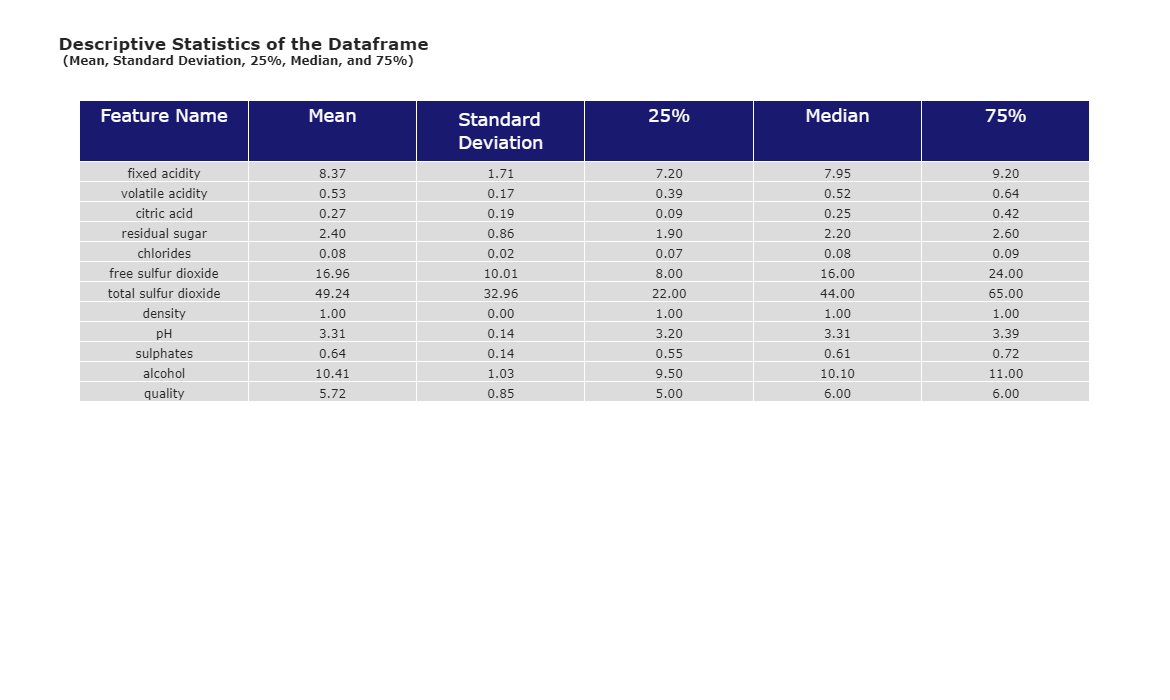

In [24]:
describe(df)

> <p style="font-size: 20px"><b>📝 We have different scales across the attributes. We may benefit from using rescaling methods, such as StandardScaling.</b></p>

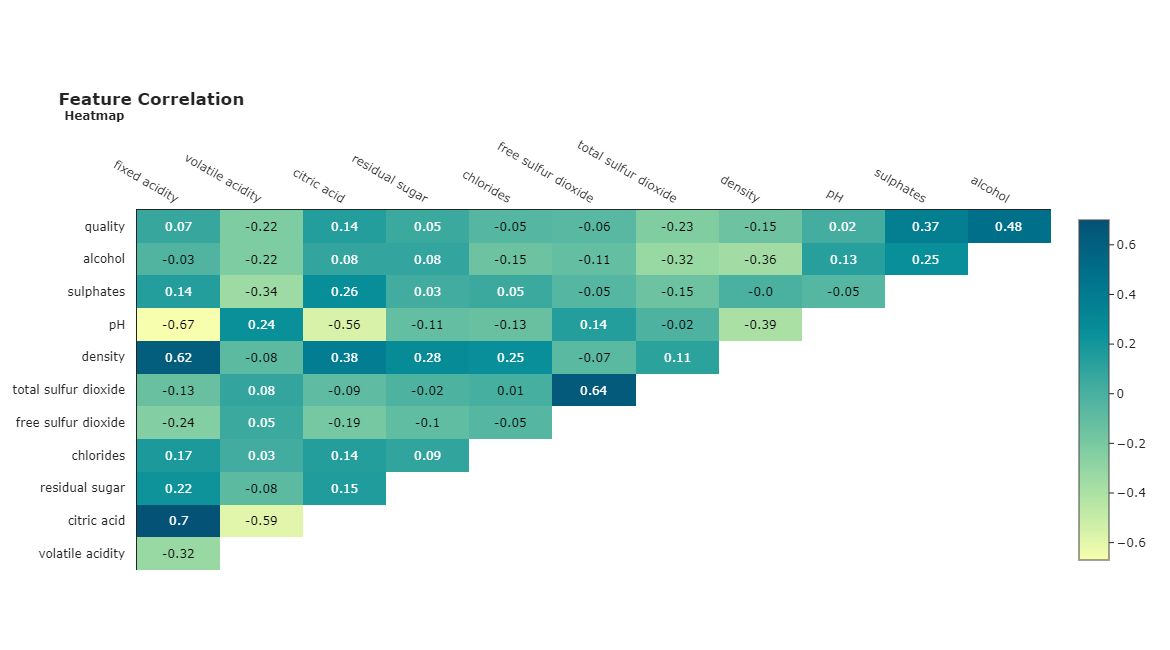

In [25]:
plot_correlation(df)

> <p style="font-size: 20px"><b>📝 The highest correlated feature with the target variable <code>quality</code> is <code>alcohol</code>, with 0.48 correlation. <br><br>
    📝 The highest positive correlation is between <code>citric acid</code> and <code>fixed acidity</code>, at 0.7. <br><br>
    📝 The highest negative correlation is between <code>ph</code> and <code>fixed acidity</code>, at -0.67.</b></p>

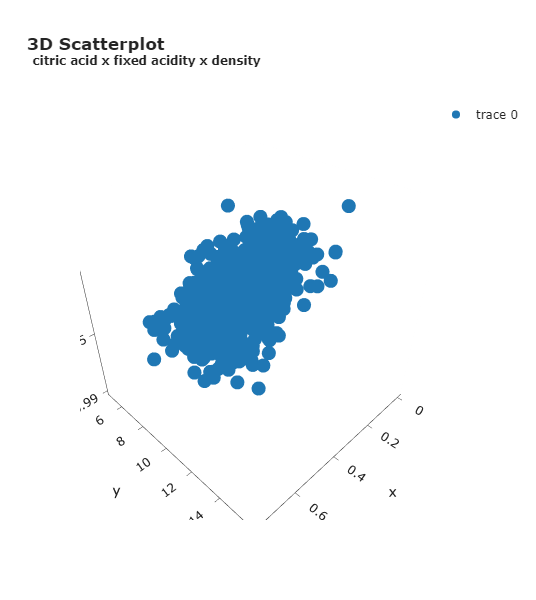

In [26]:
three_axes_scatterplot(df, 'citric acid', 'fixed acidity', 'density')

> <p style="font-size: 20px"><b>📝 In the 3D Scatterplot above, we can see the relationships between <code>citric acid</code>, <code>fixed acidity</code>, and <code>density</code>, which are highy-correlated features.</b></p>

<h1 id = 'eda2' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 26px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Continuous Features</h1>

In [27]:
cols = df.columns.tolist()
cols.remove('quality')

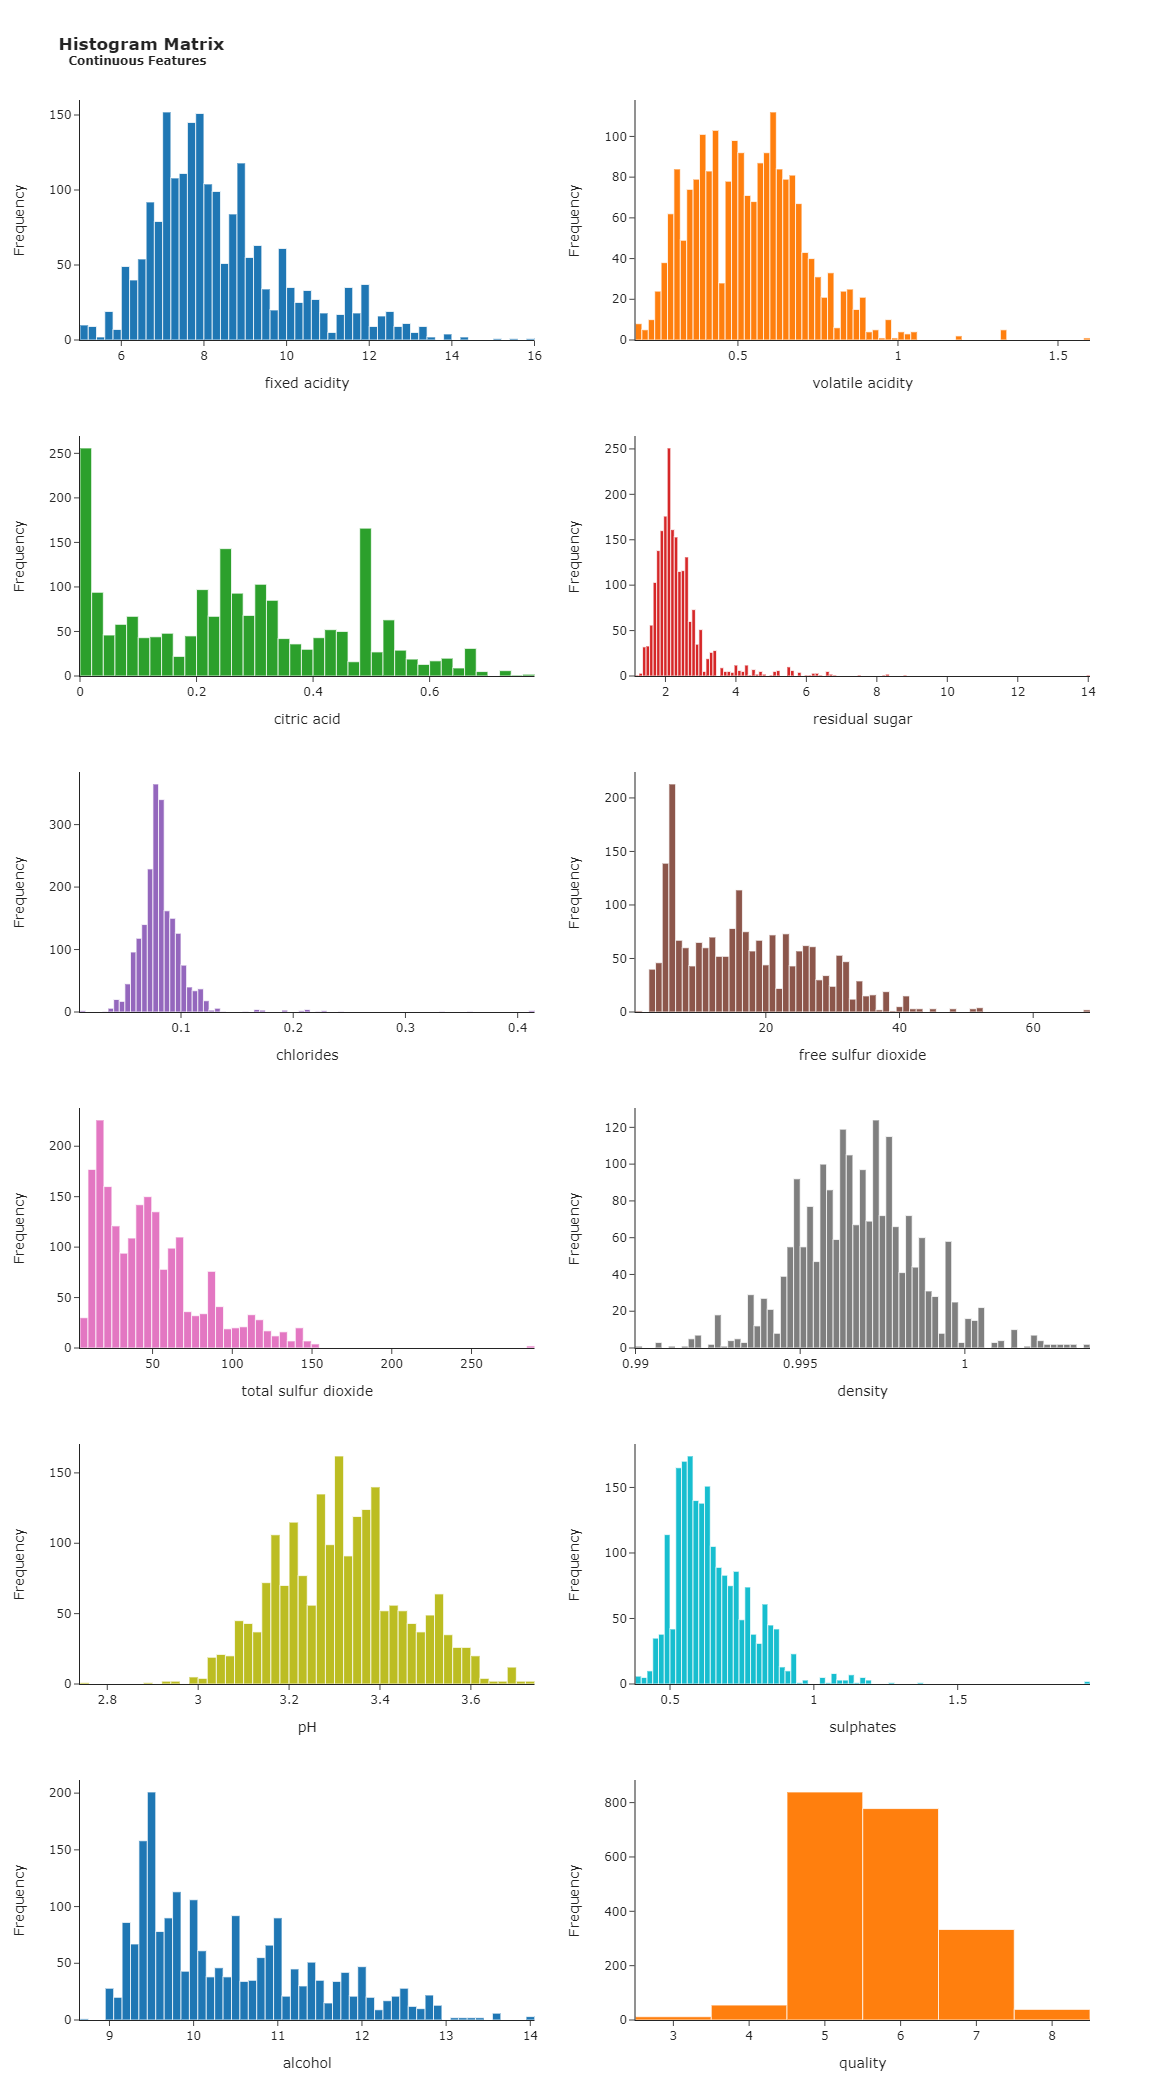

In [28]:
plot_histogram_matrix(df)

> <p style="font-size: 20px"><b>📝 Most distributions do not seem to follow a gaussian-like distribution (i.e., a normal distribution). <br><br>
    📝 <code>residual sugar</code> and <code>chlorides</code> seem to be very skewed. <br><br></b></p>

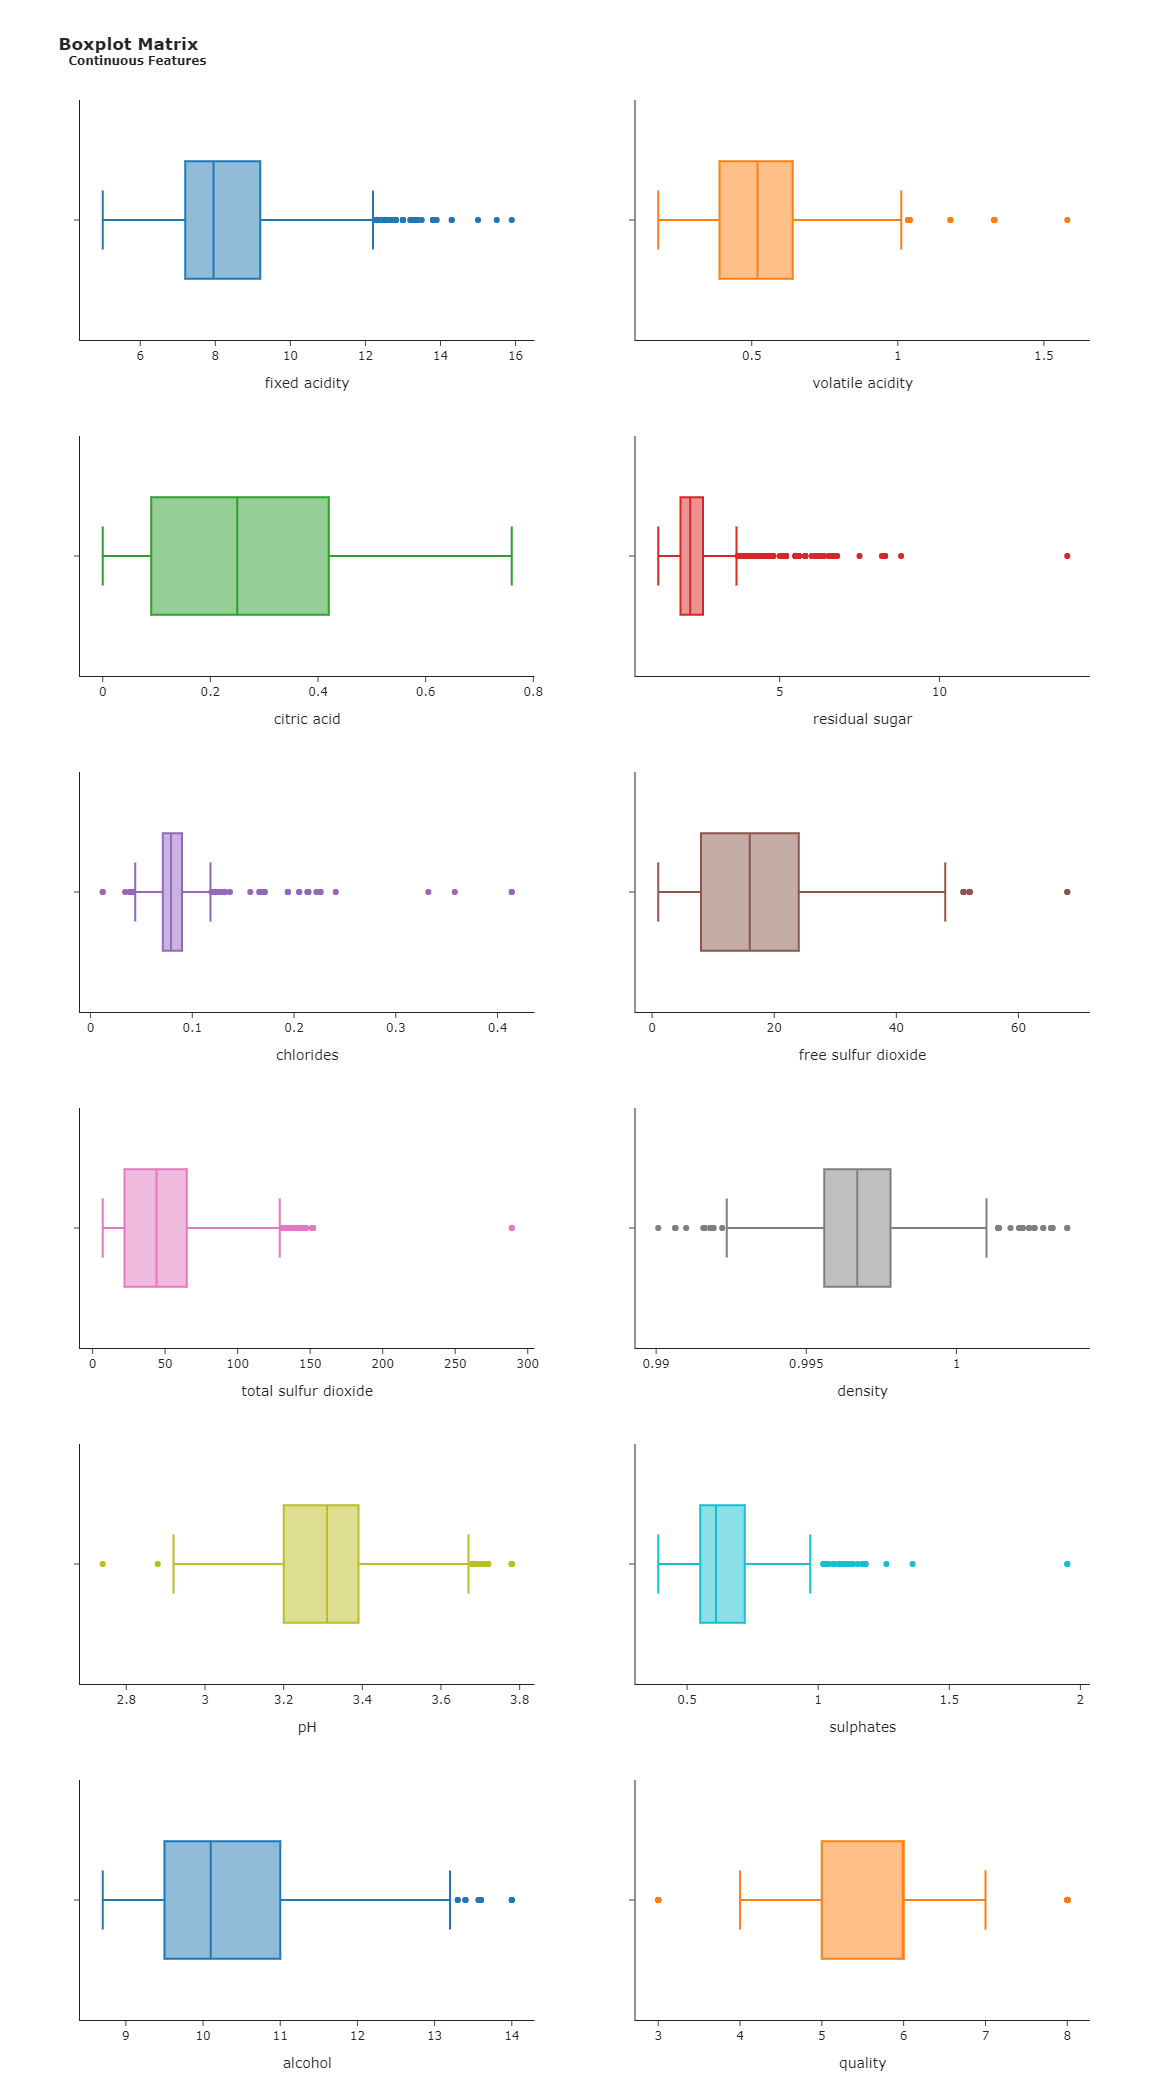

In [29]:
plot_boxplot_matrix(df)

> <p style="font-size: 20px"><b>📝 We have <i>outliers</i> present in every feature except for <code>citric acid</code>.</b></p>

In [30]:
shapiro_wilk_test(df)

Shapiro-Wilk Test & Skewness:

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

fixed acidity

  Shapiro-Wilk Statistic: 0.94

  Shapiro-Wilk P-value: 1.043201259977356e-28

  Skewness: 0.96

  Conclusion: fixed acidity Does Not Seem to be Normally Distributed

volatile acidity

  Shapiro-Wilk Statistic: 0.97

  Shapiro-Wilk P-value: 2.9064819666686194e-20

  Skewness: 0.67

  Conclusion: volatile acidity Does Not Seem to be Normally Distributed

citric acid

  Shapiro-Wilk Statistic: 0.95

  Shapiro-Wilk P-value: 2.543000856797301e-25

  Skewness: 0.25

  Conclusion: citric acid Does Not Seem to be Normally Distributed

residual sugar

  Shapiro-Wilk Statistic: 0.70

  Shapiro-Wilk P-value: 0.0

  Skewness: 3.75

  Conclusion: residual sugar Does Not Seem to be Normally Distributed

chlorides

  Shapiro-Wilk Statistic: 0.69

  Shapiro-Wilk P-value: 0.0

  Skewness: 5.26

  Conclusion: chlorides Does Not Seem to be Normally Dist

> <p style="font-size: 20px"><b>📝 The Shapiro-Wilk test confirms the <u>non-normality</u> of the distributions.</b></p>

<h1 id = 'eda2' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 26px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Target Variable - Wine Quality</h1>

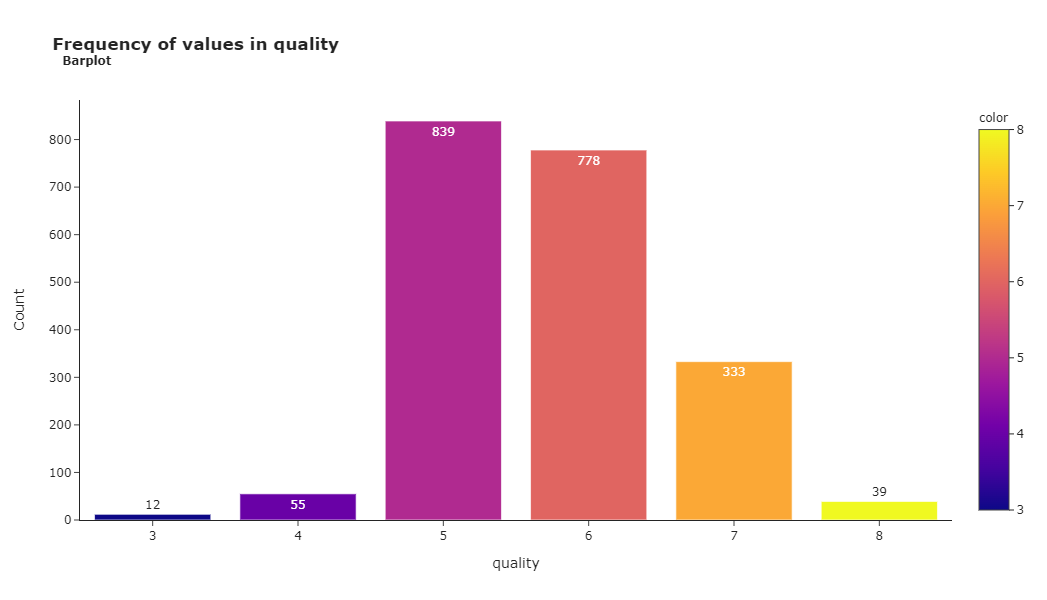

In [31]:
barplot(df, 'quality')

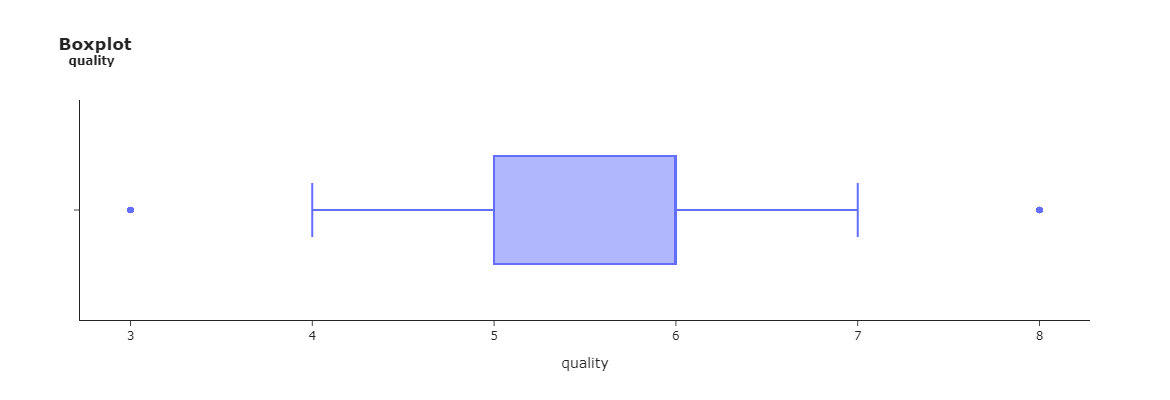

In [32]:
individual_boxplot(df, 'quality')

> <p style="font-size: 20px"><b>📝 Most wines are classified as either 5 or 6 in quality. <br><br>
    📝 A low number of wines are classified as "exceptionally good" (8). An even lower number gets classified as "awful" (3).</b></p>

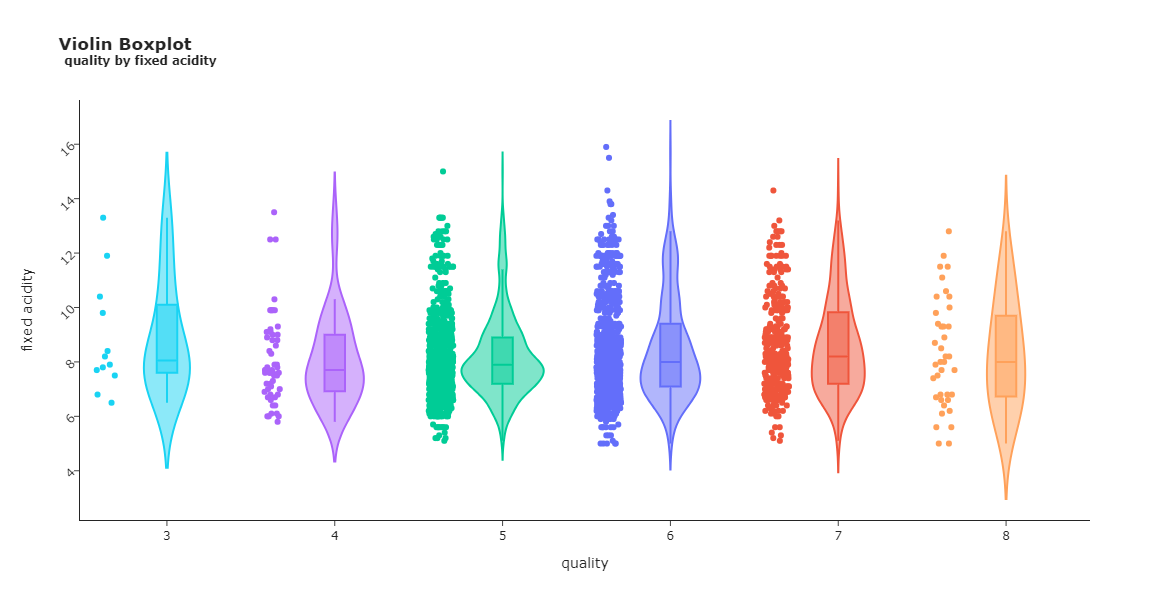

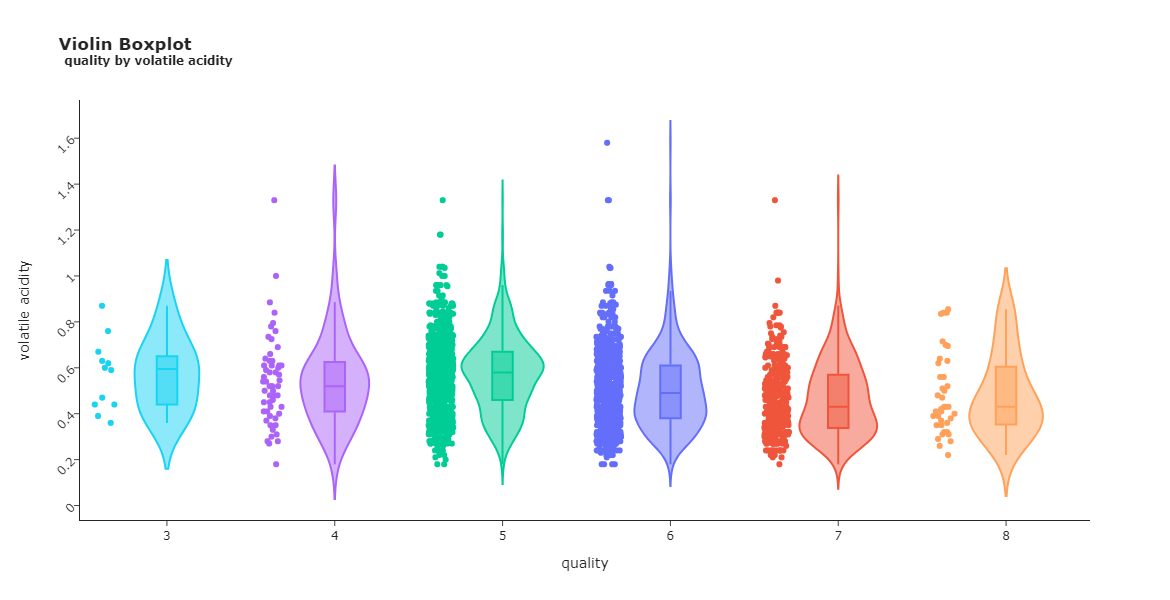

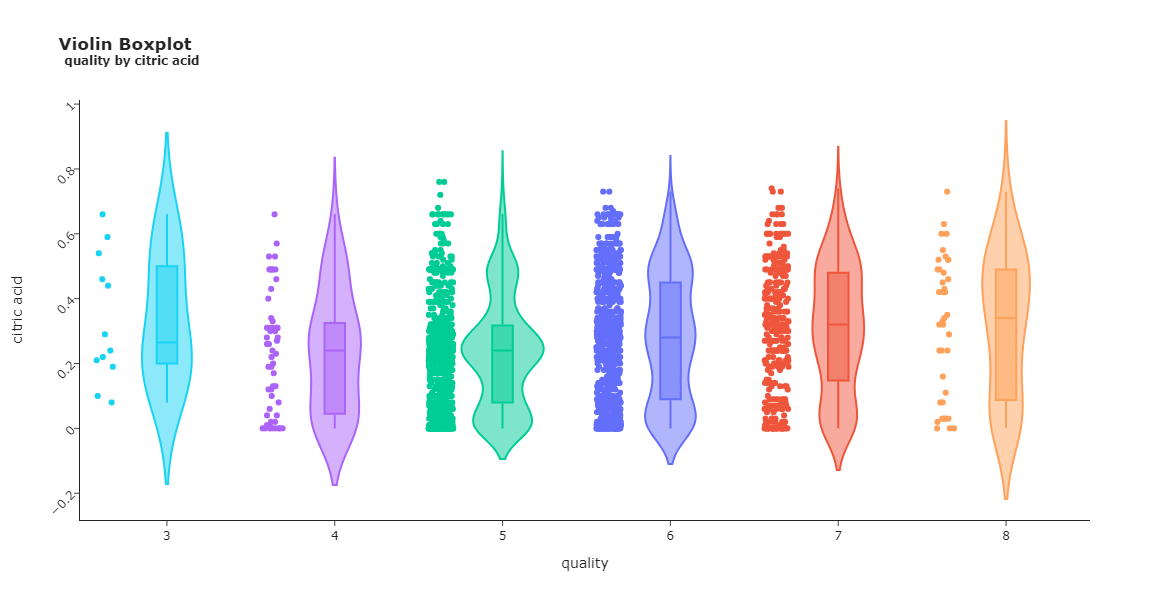

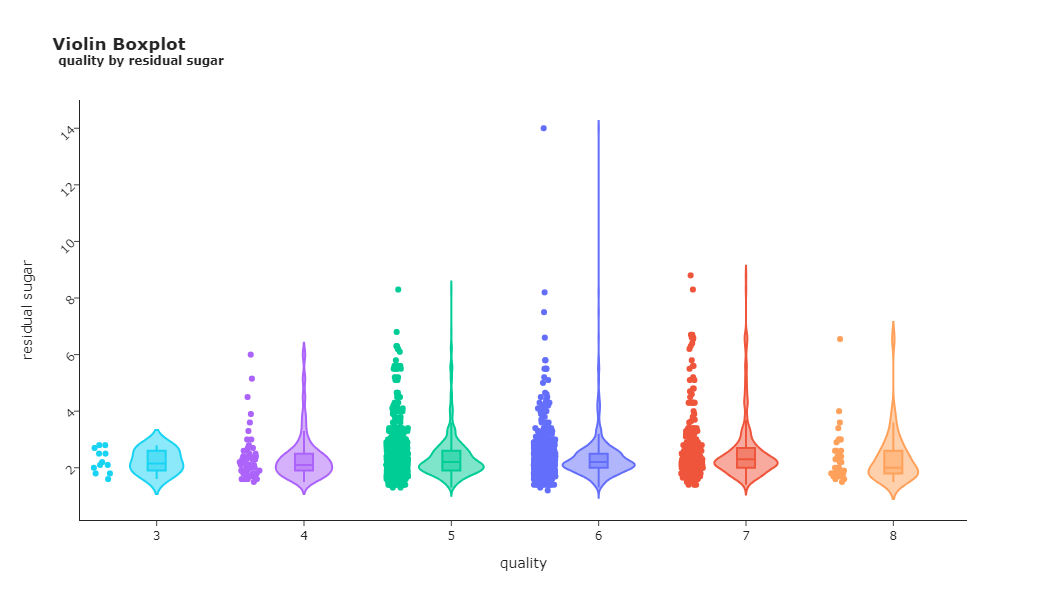

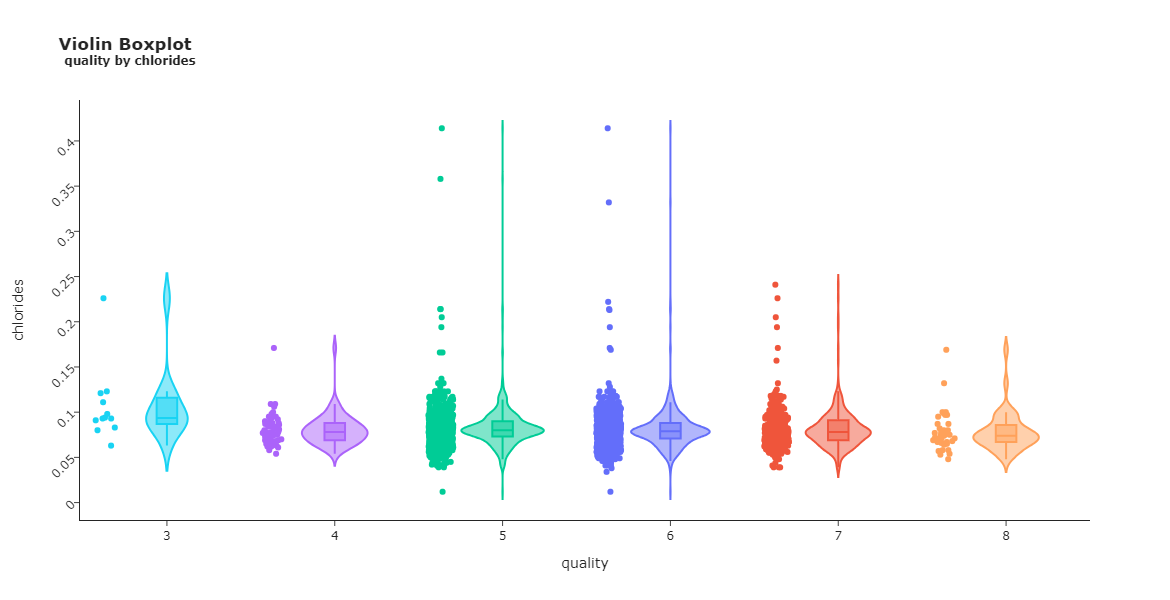

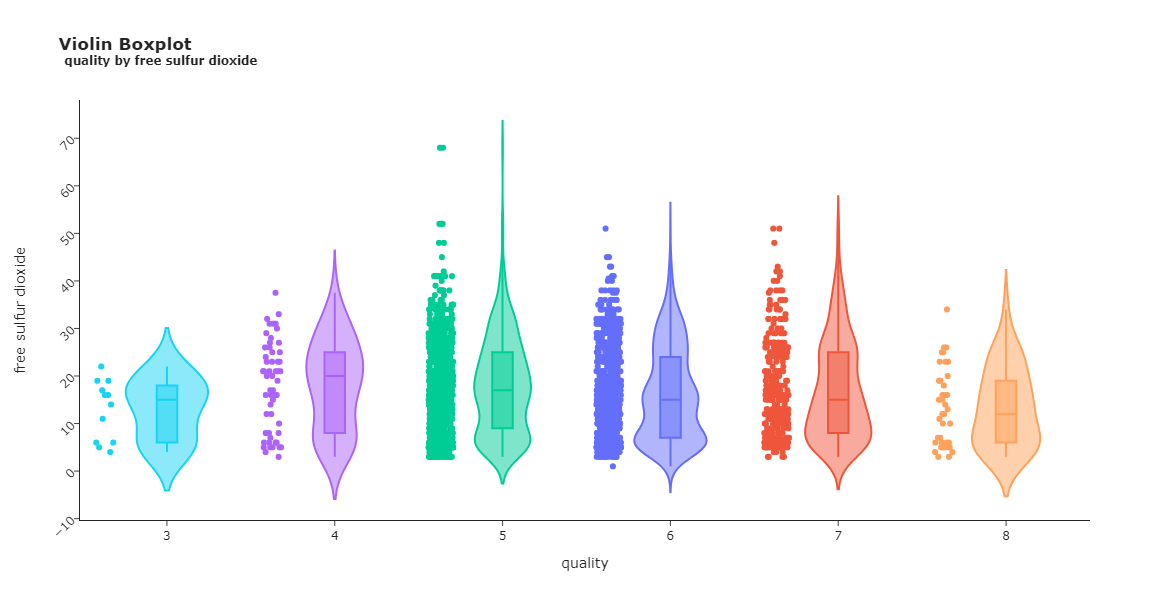

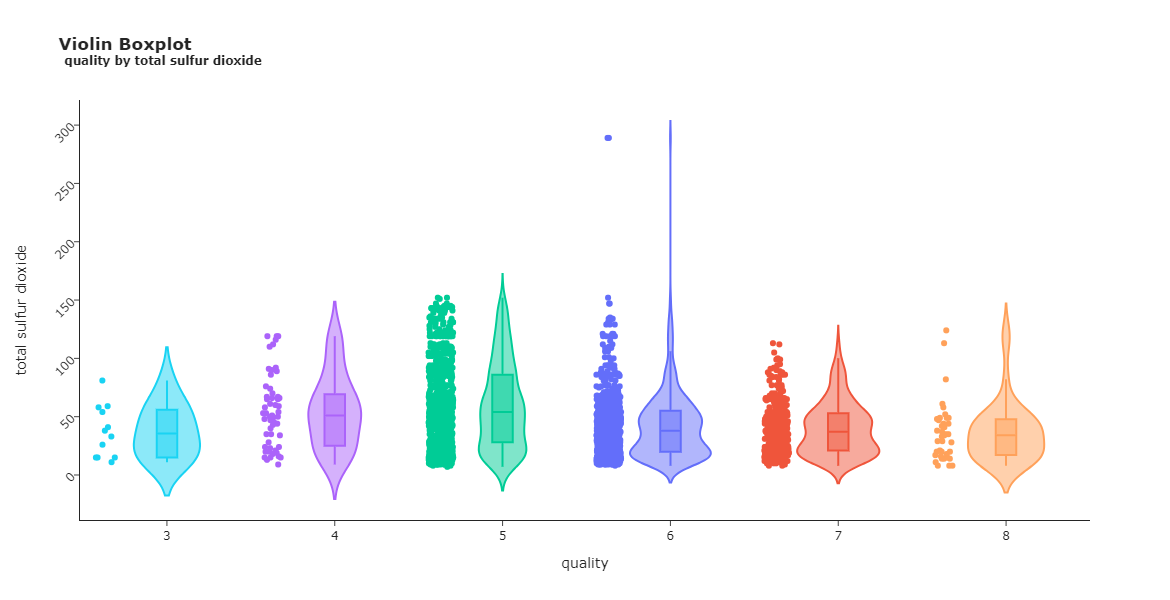

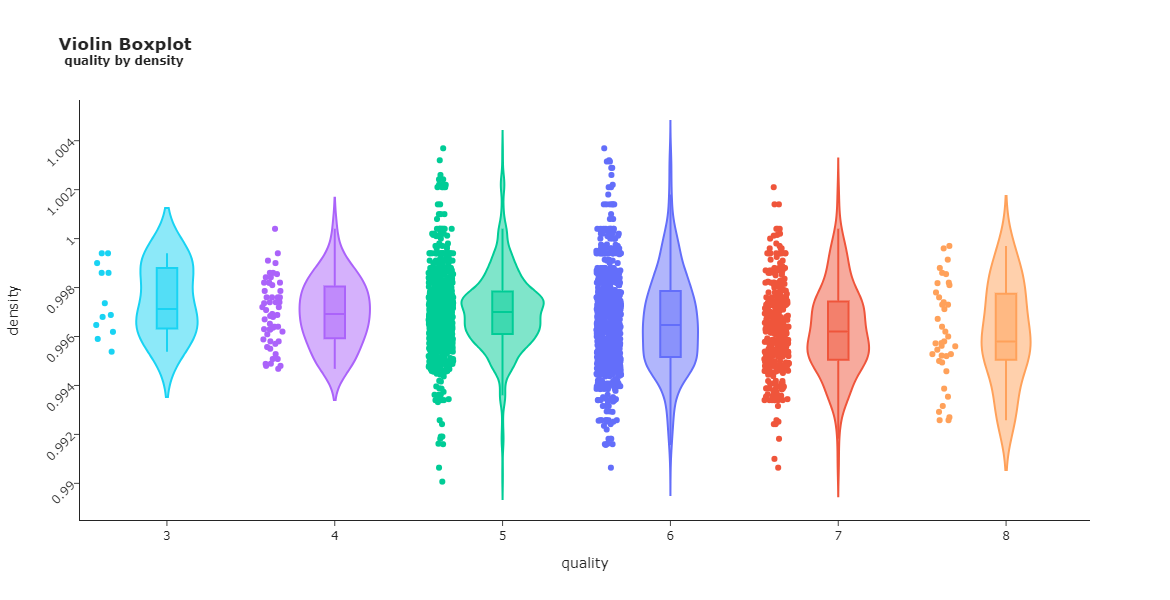

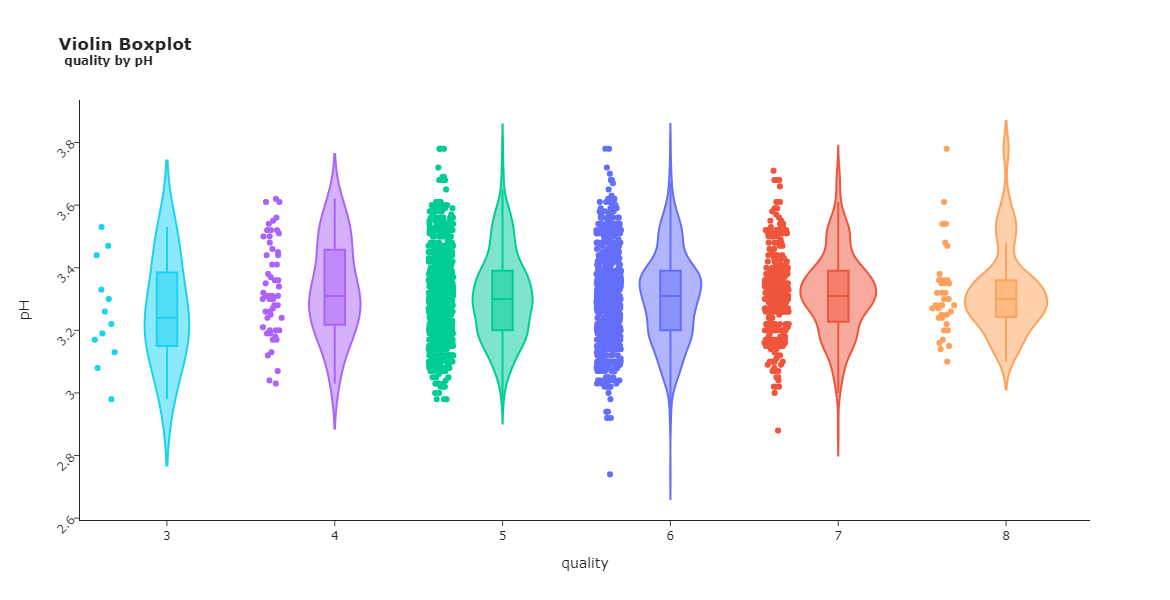

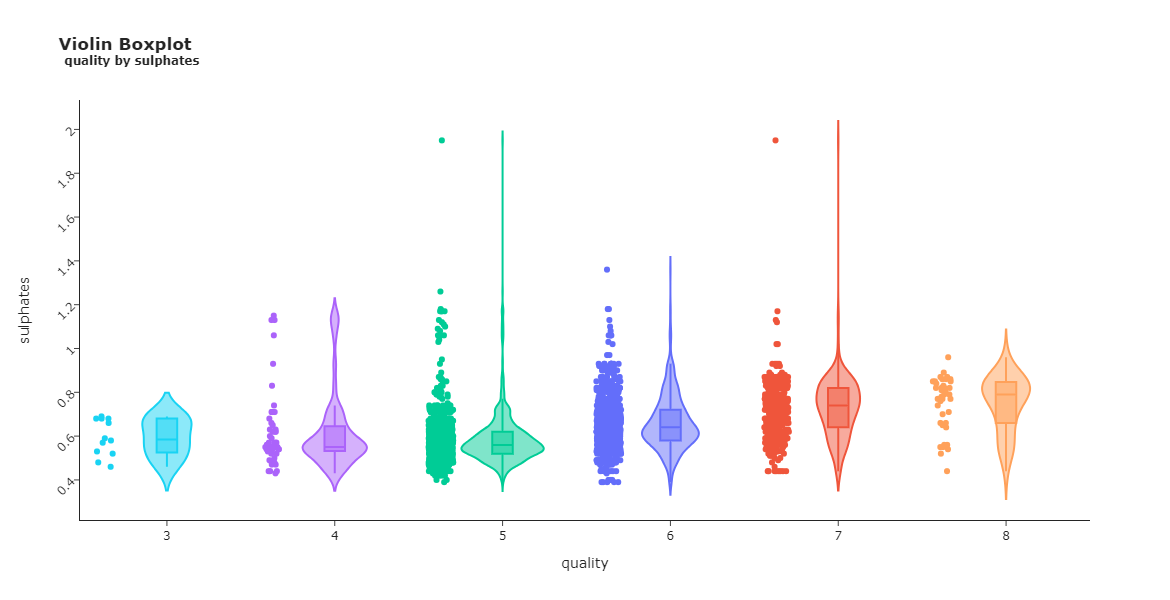

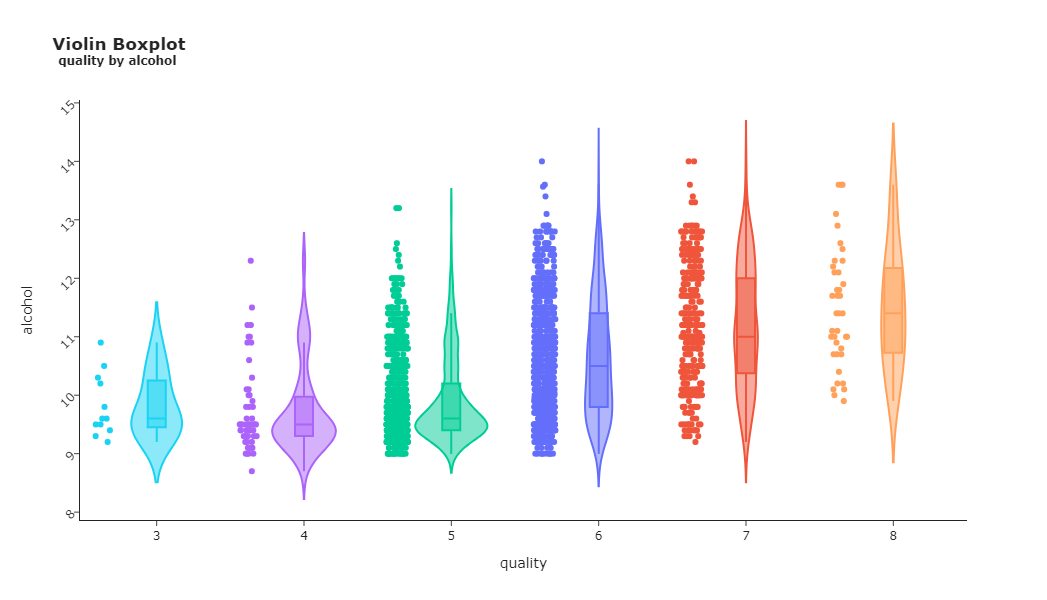

In [33]:
features = df.columns.tolist()
features.remove('quality')
for i in features:
    violin_boxplot(df, i, 'quality', 'quality')

> <p style="font-size: 20px"><b>📝 The violin boxplot confirms the high positive correlation between <code>alcohol</code> and <code>quality</code>. The higher the alcohol, the higher the quality of the wine. <br><br>
    📝 Similar behavior can be seen in <code>sulphates</code>, as higher median values suggest higher quality.<br><br>
    📝 As the median value of <code>volatile acidity</code> gets lower, the quality gets higher. This suggests a negative correlation between this feature and the target variable.</b></p>

<h1 id = 'eng' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 38px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Feature Engineering</h1>

<p style="font-size: 20px">For feature engineering, we are going to create a function to perform some operations to create new features. These new features mays be able to increase the accuracy of our model in predicting wine quality.</p>

<h1 id = 'feat_eng2' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 26px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Creating New Features</h1>

<p style="font-size: 20px">First, we create a copy of the original dataframe to test some basic preprocessing steps. <br><br>
It is important to work with a copy of the original dataframe in case something goes wrong.</p>

In [34]:
# Creating a copy of the dataframe
copy_df = df.copy()
copy_df.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.0              0.50         0.39             2.2      0.073   
1            9.3              0.30         0.73             2.3      0.092   
2            7.1              0.51         0.03             2.1      0.059   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 30.0                  39.0  0.99572  3.33       0.77   
1                 30.0                  67.0  0.99854  3.32       0.67   
2                  3.0                  12.0  0.99660  3.52       0.73   

   alcohol  quality  
0     12.1        6  
1     12.8        6  
2     11.3        7

In [35]:
# Cleaning column names and creating new features
def feat_eng(df):
    df.columns = df.columns.str.replace(' ', '_')
    df['total_acidity'] = df['fixed_acidity'] + df['volatile_acidity'] + df['citric_acid']
    df['acidity_to_pH_ratio'] = df['total_acidity'] / df['pH']
    df['free_sulfur_dioxide_to_total_sulfur_dioxide_ratio'] = df['free_sulfur_dioxide'] / df['total_sulfur_dioxide']
    df['alcohol_to_acidity_ratio'] = df['alcohol'] / df['total_acidity']
    df['residual_sugar_to_citric_acid_ratio'] = df['residual_sugar'] / df['citric_acid']
    df['alcohol_to_density_ratio'] = df['alcohol'] / df['density']
    df['total_alkalinity'] = df['pH'] + df['alcohol']
    df['total_minerals'] = df['chlorides'] + df['sulphates'] + df['residual_sugar']
    
    # Cleaning inf or null values that may result from the operations above
    df = df.replace([np.inf, -np.inf], 0)
    df = df.dropna()
    
    return df

<p style="font-size: 20px">Below, you may see the dataframe with the new features.</p>

In [36]:
copy_df = feat_eng(copy_df)
copy_df.head(5)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            8.0              0.50         0.39             2.2      0.073   
1            9.3              0.30         0.73             2.3      0.092   
2            7.1              0.51         0.03             2.1      0.059   
3            8.1              0.87         0.22             2.6      0.084   
4            8.5              0.36         0.30             2.3      0.079   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 30.0                  39.0  0.99572  3.33       0.77   
1                 30.0                  67.0  0.99854  3.32       0.67   
2                  3.0                  12.0  0.99660  3.52       0.73   
3                 11.0                  65.0  0.99730  3.20       0.53   
4                 10.0                  45.0  0.99444  3.20       1.36   

   alcohol  quality  total_acidity  acidity_to_pH_ratio  \
0     12.1        6           8.89             2.669670   
1     12.8        6          10.33             3.111446   
2     11.3        7           7.64             2.170455   
3      9.8        5           9.19             2.871875   
4      9.5        6           9.16             2.862500   

   free_sulfur_dioxide_to_total_sulfur_dioxide_ratio  \
0                                           0.769231   
1                                           0.447761   
2                                           0.250000   
3                                           0.169231   
4                                           0.222222   

   alcohol_to_acidity_ratio  residual_sugar_to_citric_acid_ratio  \
0                  1.361080                             5.641026   
1                  1.239109                             3.150685   
2                  1.479058                            70.000000   
3                  1.066376                            11.818182   
4                  1.037118                             7.666667   

   alcohol_to_density_ratio  total_alkalinity  total_minerals  
0                 12.152011             15.43           3.043  
1                 12.818715             16.12           3.062  
2                 11.338551             14.82           2.889  
3                  9.826532             13.00           3.214  
4                  9.553115             12.70           3.739

<h1 id = 'feat_eng3' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 28px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Transforming Distribution</h1>

<p style="font-size: 20px">By plotting the <code>histogram matrix</code>, we were able to realize the our data is not normally-distributed. In an attempt to improve performance and avoid biases, I am going to transfrom the distributions in the data for a more gaussian-like distribution. <br><br>
I am going to use the <code>X_y_split</code> function to split the data into <b><i>Independent Features</i></b> $X$ and <b><i>Target Variable</i></b> $y$.</p>

In [37]:
X, y = X_y_split(copy_df, 'quality')


X shape: (2056, 19)


2056 Samples 


19 Attributes 



fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            8.0              0.50         0.39             2.2      0.073   
1            9.3              0.30         0.73             2.3      0.092   
2            7.1              0.51         0.03             2.1      0.059   
3            8.1              0.87         0.22             2.6      0.084   
4            8.5              0.36         0.30             2.3      0.079   
5            9.9              0.51         0.44             2.2      0.111   
6            7.2              0.87         0.00             2.3      0.080   
7            7.5              0.43         0.32             1.8      0.066   
8           11.6              0.38         0.55             2.2      0.084   
9            7.8              0.78         0.09             2.2      0.049   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 30.0                  39.0  0.99572  3.33       0.77   
1                 30.0                  67.0  0.99854  3.32       0.67   
2                  3.0                  12.0  0.99660  3.52       0.73   
3                 11.0                  65.0  0.99730  3.20       0.53   
4                 10.0                  45.0  0.99444  3.20       1.36   
5                 30.0                 134.0  0.99820  3.11       0.54   
6                  6.0                  18.0  0.99552  3.34       0.60   
7                 18.0                  40.0  0.99560  3.30       0.43   
8                 17.0                  40.0  1.00080  3.17       0.73   
9                 13.0                  29.0  0.99682  3.51       0.49   

   alcohol  total_acidity  acidity_to_pH_ratio  \
0     12.1           8.89             2.669670   
1     12.8          10.33             3.111446   
2     11.3           7.64             2.170455   
3      9.8           9.19             2.871875   
4      9.5           9.16             2.862500   
5      9.6          10.85             3.488746   
6     11.3           8.07             2.416168   
7      9.7           8.25             2.500000   
8      9.8          12.53             3.952681   
9      9.5           8.67             2.470085   

   free_sulfur_dioxide_to_total_sulfur_dioxide_ratio  \
0                                           0.769231   
1                                           0.447761   
2                                           0.250000   
3                                           0.169231   
4                                           0.222222   
5                                           0.223881   
6                                           0.333333   
7                                           0.450000   
8                                           0.425000   
9                                           0.448276   

   alcohol_to_acidity_ratio  residual_sugar_to_citric_acid_ratio  \
0                  1.361080                             5.641026   
1                  1.239109                             3.150685   
2                  1.479058                            70.000000   
3                  1.066376                            11.818182   
4                  1.037118                             7.666667   
5                  0.884793                             5.000000   
6                  1.400248                             0.000000   
7                  1.175758                             5.625000   
8                  0.782123                             4.000000   
9                  1.095732                            24.444444   

   alcohol_to_density_ratio  total_alkalinity  total_minerals  
0                 12.152011             15.43           3.043  
1                 12.818715             16.12           3.062  
2                 11.338551             14.82           2.889  
3                  9.826532             13.00           3.214  
4                  9.553115             12.70           3.739  
5                  9.617311 




y shape: (2056,)


2056 Samples 



0    6
1    6
2    7
3    5
4    6
5    5
6    6
7    6
8    6
9    5
Name: quality, dtype: int64

<p style="font-size: 20px">Below, I'll conduct a simple test to see if there are any negative values in the $X$ dataframe. This is important to pick the most adequate method for transforming the distribution, as some methods don't work with negative values.</p>

In [38]:
has_negatives = np.any(X <= 0)

if has_negatives:
    print("There are negative values in the data.")
else:
    print("There are no negative values in the data.")

There are negative values in the data.


> <p style="font-size: 20px"><b>📝 By confirming the existance of negative values in the data, I decided to use <code>QuantileTransformer</code>.</b></p>

<p style="font-size: 20px">You can see below another histogram matrix displaying the new distributions across the data.</p>

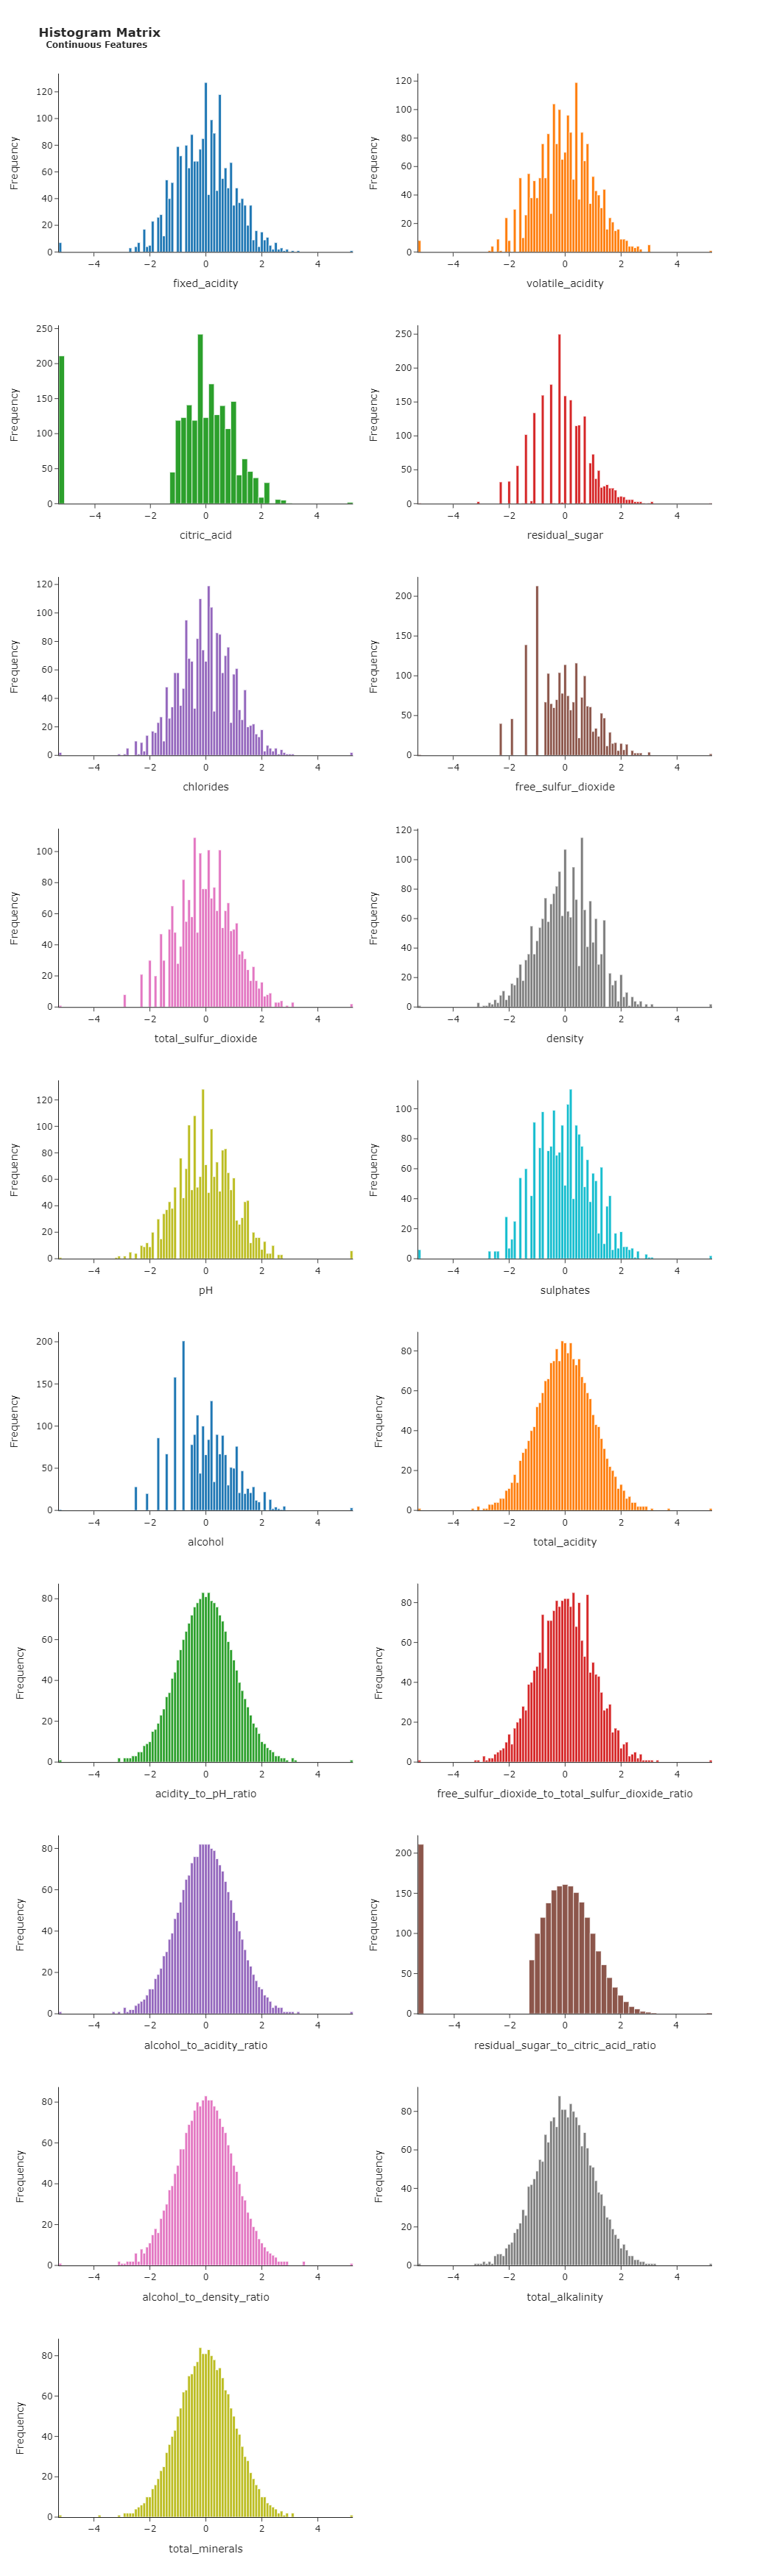

In [39]:
transformer = QuantileTransformer(output_distribution='normal')
X_transformed = transformer.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)
plot_histogram_matrix(X_transformed)

<h1 id = 'feat_eng4' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 28px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Standardizing</h1>

<p style="font-size: 20px">Some models are extremely sensitive to scale. During the exploratory analysis, we saw that our data has many different scales across features. By using <code>StandardScaler</code>, we can bring all features to the same scale by having $\mu = 0$ and $\sigma = 1$. <br><br>
In the table below, you can see the new scale across our data.</p>

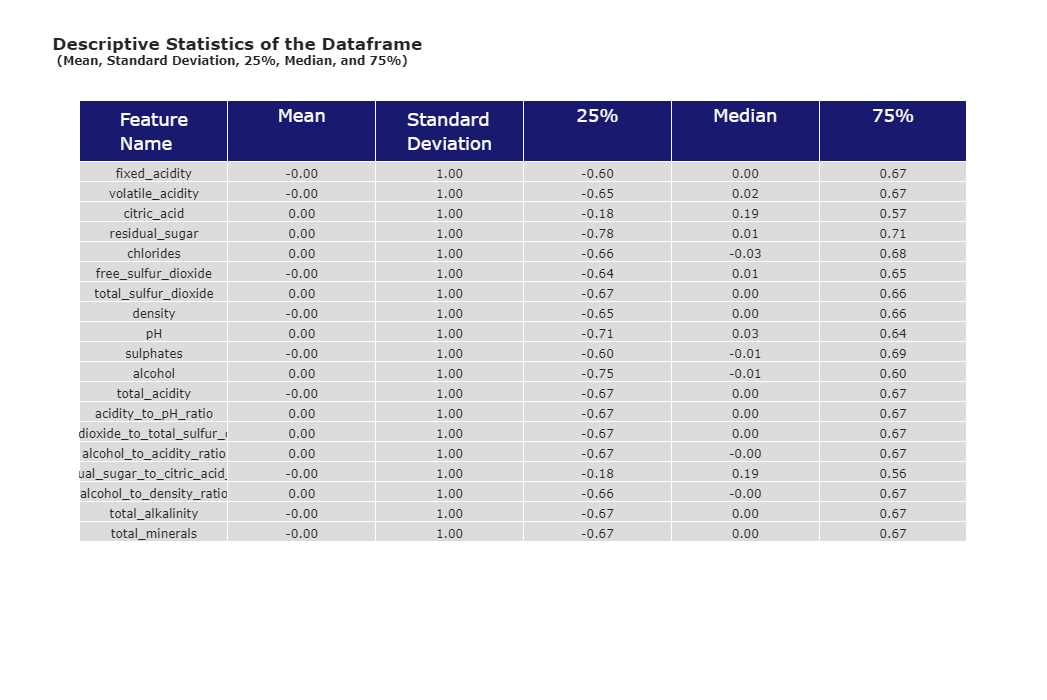

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)
X_scaled = pd.DataFrame(X_scaled, columns=X_transformed.columns)
describe(X_scaled)

<h1 id = 'select' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 38px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Feature Selection</h1>

<p style="font-size: 20px">Feature selection operates on the idea of employing different algorithms and tools to identify the most relevant variables for predicting a certain target.
<br><br>
I will be utilizing <code>RFECV</code>, with a simple <code>RandomForestClassifier</code> as the estimator, to select the features in $X$ that are considered most significant for predicting the values in $y$.
<br><br>
Let's start by defining a <code>cv</code> KFold strategy below.</p>

In [41]:
cv = StratifiedKFold(n_splits = 5,shuffle = True, random_state = seed)
cv_splits = list(cv.split(X,y))

<p style="font-size: 20px">After running <code>RFECV</code>, we may see a list of selected features. I am also going to redefine the $X$ dataframe by selecting only the features in the list.</p>

In [42]:
estimator = RandomForestClassifier(random_state=seed)
rfe = RFECV(estimator=estimator, cv=cv, scoring=make_scorer(quadratic_weighted_kappa))
rfe.fit(X, y)

selected_features = []

for i, feature in enumerate(X_scaled.columns):
    if rfe.support_[i]:
        selected_features.append(feature)

print(f'{len(selected_features)} features selected out of {len(X_scaled.columns)}.')
print(f'\nSelected Features: \n')
for feature in selected_features:
    print(feature)

16 features selected out of 19.

Selected Features: 

volatile_acidity
citric_acid
chlorides
total_sulfur_dioxide
density
pH
sulphates
alcohol
total_acidity
acidity_to_pH_ratio
free_sulfur_dioxide_to_total_sulfur_dioxide_ratio
alcohol_to_acidity_ratio
residual_sugar_to_citric_acid_ratio
alcohol_to_density_ratio
total_alkalinity
total_minerals


In [43]:
X_scaled = X_scaled[selected_features]
X_scaled.head(5)

volatile_acidity  citric_acid  chlorides  total_sulfur_dioxide   density  \
0         -0.076330     0.508947  -0.553589             -0.142310 -0.566442   
1         -1.361933     1.730563   0.770374              0.745626  1.004572   
2         -0.023067    -0.351927  -1.336598             -1.626645 -0.042952   
3          1.770765     0.067305   0.377988              0.657764  0.310036   
4         -0.857373     0.321729  -0.025974              0.049100 -1.420972   

         pH  sulphates   alcohol  total_acidity  acidity_to_pH_ratio  \
0  0.155189   0.953842  1.406556       0.079472            -0.009198   
1  0.099862   0.410132  2.038955       0.816195             0.701172   
2  1.314119   0.755430  0.798575      -0.917450            -1.087849   
3 -0.708869  -0.868483 -0.301802       0.263831             0.321004   
4 -0.708869   2.997112 -0.754706       0.247136             0.304314   

   free_sulfur_dioxide_to_total_sulfur_dioxide_ratio  \
0                                           2.329995   
1                                           0.492392   
2                                          -0.751248   
3                                          -1.583415   
4                                          -1.022301   

   alcohol_to_acidity_ratio  residual_sugar_to_citric_acid_ratio  \
0                  0.777777                            -0.019915   
1                  0.338287                            -0.457675   
2                  1.198958                             1.036371   
3                 -0.375436                             0.506149   
4                 -0.501615                             0.202630   

   alcohol_to_density_ratio  total_alkalinity  total_minerals  
0                  1.407556          1.421266        0.183914  
1                  1.941568          2.034824        0.216886  
2                  0.791176          0.925482       -0.095595  
3                 -0.316459         -0.439173        0.493229  
4                 -0.601954         -0.952784        1.189350

<h1 id = 'cluster' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 38px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Clustering</h1>

<p style="font-size: 20px">Clustering is done to identify natural groupings within the data that may not have been previously apparent.
<br><br>
I will use <code>KMeans</code>, which is probably the most popular clustering algorithm, to segregate our data into distinct clusters, based on feature similarities.
<br><br>
To identify the optimal number of clusters, I'll use the <b>Elbow Curve</b> method. This technique can help us to identify the right count of clusters where the rate of decrease in within-cluster sum of squares (WCSS) starts to diminish.
<br><br>
Let's take a look at the plot below.</p>

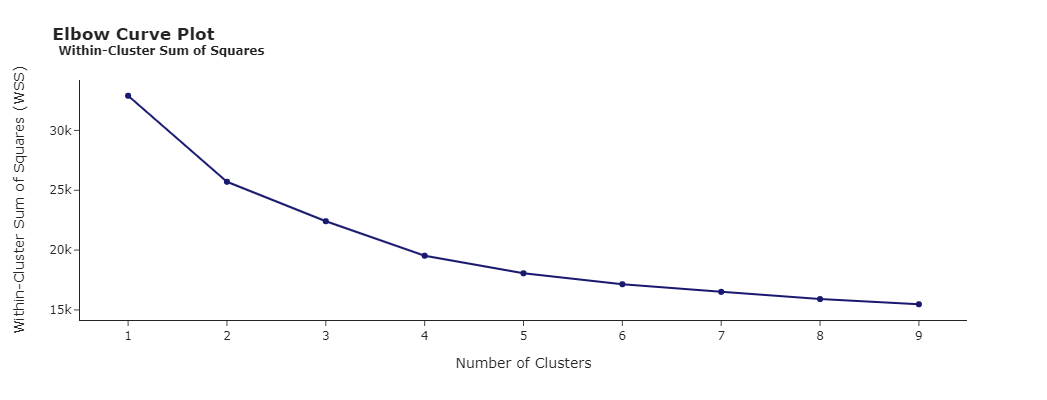

In [44]:
wss_values = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, random_state = seed)
    kmeans.fit(X_scaled) 
    wss_values.append(kmeans.inertia_) 
elbow_curve(wss_values)

<p style="font-size: 20px">It seems like the optimal number of clusters may be around $K = 3$ or $K = 4$. <br><br>
I am going to cluster our data twice, segregating it into three clusters and first and four clusters afterwards. We can then see a clustered scatterplot to see what kind of behavior we may identify in the data.</p>

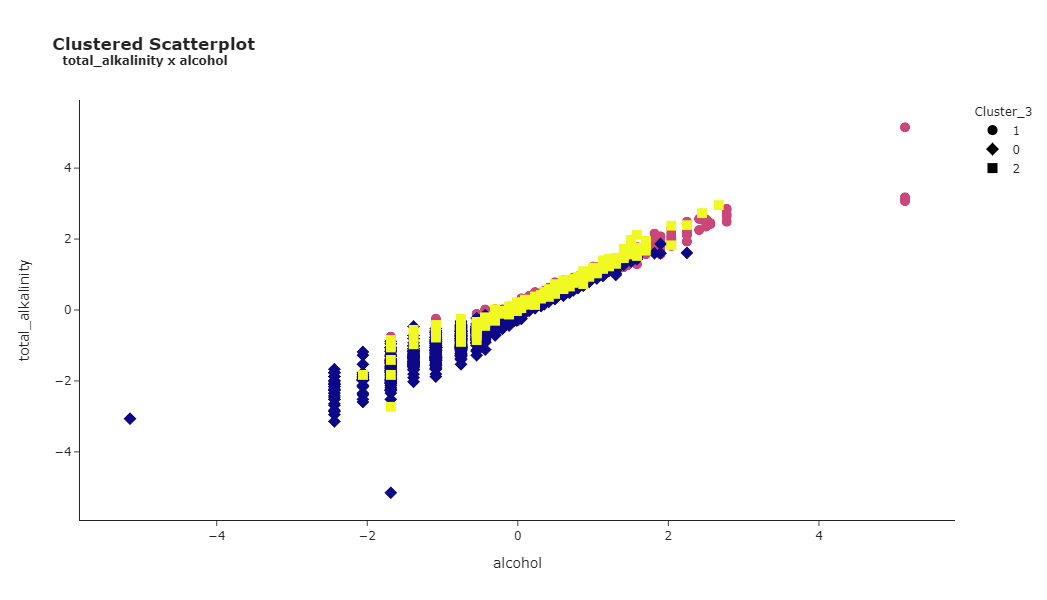

Cluster Count:
0    994
1    854
2    208
Name: Cluster_3, dtype: int64


In [45]:
kmeans = KMeans(n_clusters = 3, random_state = seed)
kmeans.fit(X_scaled)
X_scaled['Cluster_3'] = kmeans.labels_
clustered_scatterplot(X_scaled,'total_alkalinity', 'alcohol', 'Cluster_3')

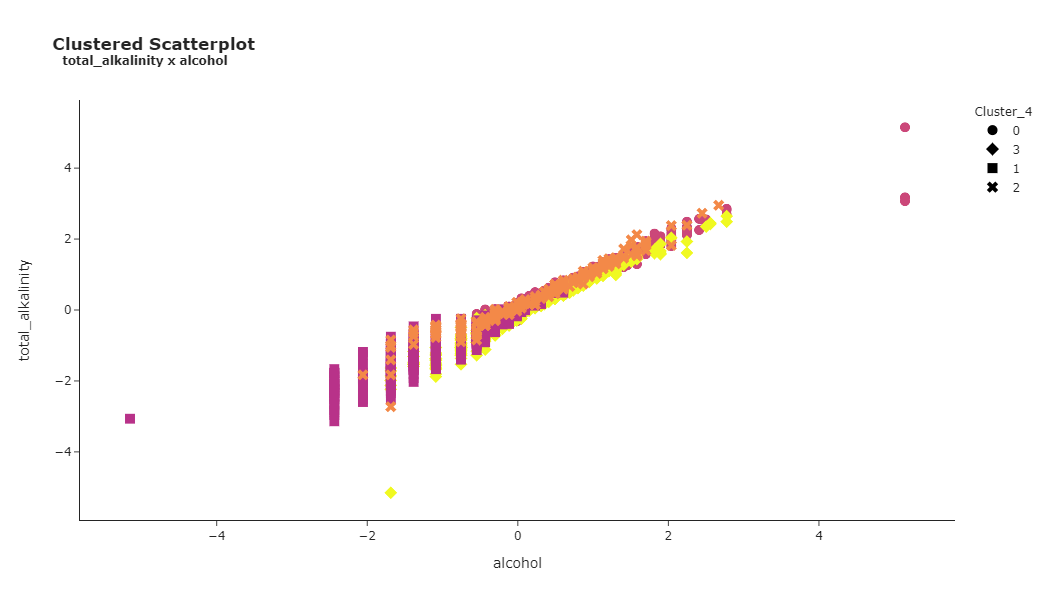

Cluster Count:
0    729
1    673
3    446
2    208
Name: Cluster_4, dtype: int64


In [46]:
kmeans = KMeans(n_clusters = 4, random_state = seed)
kmeans.fit(X_scaled)
X_scaled['Cluster_4'] = kmeans.labels_
clustered_scatterplot(X_scaled,'total_alkalinity', 'alcohol', 'Cluster_4')

> <p style="font-size: 20px"><b>📝 It seems like $K = 3$ is able to better group the data. <br><br>
    📝 We can clearly see that <code>cluster 0</code> is more concentrated towards negative values, while <code>cluster 1</code> is more concentrated towards positive values. <code>cluster 2</code> gets grouped towards the middle.</b></p>

<h1 id = 'model' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 38px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Modeling</h1>

<p style="font-size: 20px">The first part of our modeling process is building the <code>pipeline</code>. <br><br>
The purpose of the pipeline is to easily and autonomously preprocess the data by performing the transformations we've performed on the <code>copy_df</code> dataframe above.</p>

<h1 id = 'eda2' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 26px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Building Pipeline</h1>

<p style="font-size: 20px">Below you can see the original dataframe with the raw data, without any transformation.</p>

In [47]:
df 

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               8.0              0.50         0.39            2.20      0.073   
1               9.3              0.30         0.73            2.30      0.092   
2               7.1              0.51         0.03            2.10      0.059   
3               8.1              0.87         0.22            2.60      0.084   
4               8.5              0.36         0.30            2.30      0.079   
...             ...               ...          ...             ...        ...   
2051            6.6              0.31         0.13            2.00      0.056   
2052            9.7              0.59         0.21            1.80      0.079   
2053            7.7              0.43         0.42            1.70      0.071   
2054            9.1              0.50         0.00            1.75      0.058   
2055            6.2              0.31         0.18            2.30      0.059   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    30.0                  39.0  0.99572  3.33       0.77   
1                    30.0                  67.0  0.99854  3.32       0.67   
2                     3.0                  12.0  0.99660  3.52       0.73   
3                    11.0                  65.0  0.99730  3.20       0.53   
4                    10.0                  45.0  0.99444  3.20       1.36   
...                   ...                   ...      ...   ...        ...   
2051                 29.0                  42.0  0.99388  3.52       0.87   
2052                 27.0                  65.0  0.99745  3.14       0.58   
2053                 19.0                  37.0  0.99258  3.32       0.77   
2054                  5.0                  13.0  0.99670  3.22       0.42   
2055                 12.0                  28.0  0.99520  3.56       0.88   

      alcohol  quality  
0        12.1        6  
1        12.8        6  
2        11.3        7  
3         9.8        5  
4         9.5        6  
...       ...      ...  
2051     12.0        7  
2052      9.4        5  
2053     12.5        8  
2054      9.5        5  
2055     11.4        7  

[2056 rows x 12 columns]

<p style="font-size: 20px">In the following cells, I am going to create some functions and classes that are going to compose our Pipeline.</p>

In [48]:
# Cleaning and creating features
def feat_eng(df):
    df.columns = df.columns.str.replace(' ', '_')
    df['total_acidity'] = df['fixed_acidity'] + df['volatile_acidity'] + df['citric_acid']
    df['acidity_to_pH_ratio'] = df['total_acidity'] / df['pH']
    df['free_sulfur_dioxide_to_total_sulfur_dioxide_ratio'] = df['free_sulfur_dioxide'] / df['total_sulfur_dioxide']
    df['alcohol_to_acidity_ratio'] = df['alcohol'] / df['total_acidity']
    df['residual_sugar_to_citric_acid_ratio'] = df['residual_sugar'] / df['citric_acid']
    df['alcohol_to_density_ratio'] = df['alcohol'] / df['density']
    df['total_alkalinity'] = df['pH'] + df['alcohol']
    df['total_minerals'] = df['chlorides'] + df['sulphates'] + df['residual_sugar']

    df = df.replace([np.inf, -np.inf], 0)
    df = df.dropna()
    
    df = df[selected_features]
    
    return df

In [49]:
# Applying QuantileTransformer to change the distribution to a gaussian-like distribution
class CustomQuantileTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, random_state=None):
        self.random_state = random_state
        self.quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=self.random_state)

    def fit(self, X_train, y=None):
        self.quantile_transformer.fit(X_train)
        return self

    def transform(self, X):
        X_transformed = self.quantile_transformer.transform(X)
        X = pd.DataFrame(X_transformed, columns=X.columns)
        return X

In [50]:
# Applying StandardScaler to bring every feature to the same scale
class CustomStandardScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self, X_train, y=None):
        self.scaler.fit(X_train)
        return self

    def transform(self, X):
        X_transformed = self.scaler.transform(X)
        X = pd.DataFrame(X_transformed, columns=X.columns)
        return X

In [51]:
# Applying KMeans clustering with n_clusters = 3

class KMeansTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, n_clusters=3, random_state=seed):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)
   
    def fit(self, X_train, y=None):
        self.kmeans.fit(X_train)
        return self
    
    def transform(self, X):
        X_clustered = pd.DataFrame(X.copy())
        cluster_labels = self.kmeans.predict(X)
        X_clustered['Cluster'] = cluster_labels
        return X_clustered

<p style="font-size: 20px">After creating all the steps above, we define the Pipeline. <br><br>
The pipeline ensures that the data will be preprocessed and transformed in a sequential order.</p>

In [52]:
pipeline = Pipeline([
    ('Feature Engineering', FunctionTransformer(feat_eng)),
    ('Transforming Distribution', CustomQuantileTransformer()),
    ('Standard Scaler', CustomStandardScaler()),
    ('Clustering', KMeansTransformer()),
    ('Model', None)
])

In [53]:
pipeline # Visualizing the pipeline

Pipeline(steps=[('Feature Engineering',
                 FunctionTransformer(func=<function feat_eng at 0x7864e46b37f0>)),
                ('Transforming Distribution', CustomQuantileTransformer()),
                ('Standard Scaler', CustomStandardScaler()),
                ('Clustering', KMeansTransformer()), ('Model', None)])

<h1 id = 'eda2' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 26px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Selecting Models</h1>

<p style="font-size: 20px">You can notice that the last step of the pipeline is currently <code>None</code>, indicating the emptyness in the <code>Model</code> parameter. 
<br><br>
We are going to perform <code>cross validation</code> with different models to see which one's the best. First, let's split our original dataframe into $X$ and $y$, similarly to what we did before with the copy dataframe.</p>

In [54]:
X, y = X_y_split(df, 'quality') # Splitting original data


X shape: (2056, 11)


2056 Samples 


11 Attributes 



fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.0              0.50         0.39             2.2      0.073   
1            9.3              0.30         0.73             2.3      0.092   
2            7.1              0.51         0.03             2.1      0.059   
3            8.1              0.87         0.22             2.6      0.084   
4            8.5              0.36         0.30             2.3      0.079   
5            9.9              0.51         0.44             2.2      0.111   
6            7.2              0.87         0.00             2.3      0.080   
7            7.5              0.43         0.32             1.8      0.066   
8           11.6              0.38         0.55             2.2      0.084   
9            7.8              0.78         0.09             2.2      0.049   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 30.0                  39.0  0.99572  3.33       0.77   
1                 30.0                  67.0  0.99854  3.32       0.67   
2                  3.0                  12.0  0.99660  3.52       0.73   
3                 11.0                  65.0  0.99730  3.20       0.53   
4                 10.0                  45.0  0.99444  3.20       1.36   
5                 30.0                 134.0  0.99820  3.11       0.54   
6                  6.0                  18.0  0.99552  3.34       0.60   
7                 18.0                  40.0  0.99560  3.30       0.43   
8                 17.0                  40.0  1.00080  3.17       0.73   
9                 13.0                  29.0  0.99682  3.51       0.49   

   alcohol  
0     12.1  
1     12.8  
2     11.3  
3      9.8  
4      9.5  
5      9.6  
6     11.3  
7      9.7  
8      9.8  
9      9.5




y shape: (2056,)


2056 Samples 



0    6
1    6
2    7
3    5
4    6
5    5
6    6
7    6
8    6
9    5
Name: quality, dtype: int64

In [55]:
# Defining CV strategy
cv = StratifiedKFold(n_splits = 5,shuffle = True, random_state = seed)
cv_splits = list(cv.split(X,y))

In [56]:
#y_range = y.max() - y.min()  
#y_median = y.median()  
#y_mean = y.mean() 
#y_std = y.std()

#print(f"Range of y: {y_range}")
#print(f"Median of y: {y_median}")
#print(f"Mean of y: {y_mean:.2f}")
#print(f"Standard deviation of y: {y_std:.2f}")

<p style="font-size: 20px">Below, I'll create a <code>classifiers</code> list, containing different algorithms that are going to be tested during cross validation.
<br><br>
The evaluation metric of this competition is the <code>Quadratic Weighted Kappa</code> score, which is a metric that evaluates the agreement between two raters, in this case, the predicted and actual values. It's particularly useful for datasets with ordinal categories, and takes both under-prediction and over-prediction into account.
<br><br>
The formula for Quadratic Weighted Kappa is given as:
<br><br></p>
<p style="font-size: 24px">
\[
\kappa = 1 - \frac{\sum_{i,j}w_{ij}O_{ij}}{\sum_{i,j}w_{ij}E_{ij}}
\]
<br><br></p>
<p style="font-size: 20px">where: <br><br>
. \(O_{ij}\) is the actual confusion matrix. <br><br>
. \(E_{ij}\) is the expected confusion matrix under randomness. <br><br>
. \(w_{ij}\) is the weighted matrix, which can be calculated as \((i-j)^2\), where \(i\) and \(j\) are the ratings.
<br><br><br>
A score of 1 implies <b>perfect agreement</b> between the raters, while a score of 0 indicates that the agreement is no better than what would be expected by random chance. Negative values suggest that the agreement is even worse than random.</p>

In [57]:
# List of classification algorithms
classifiers = [
    ('CatBoost', CatBoostClassifier(random_state = seed, verbose = False)),
    ('LightGBM', LGBMClassifier(random_state = seed)),
    #('XGboost', XGBClassifier(random_state = seed)),
    ('Ada Boost', AdaBoostClassifier(random_state = seed)),
    ('Histogram-based Gradient Boosting', HistGradientBoostingClassifier(random_state = seed))
]

<p style="font-size: 20px">We will now perform cross validation on every model in the list below, except <code>XGBoost</code>, and choose the ones with the highest mean Quadratic Weighted Kappa. We will also look for the mean standard deviation across folds. In this case, the lower standard deviation, the more stable the model is, thus more reliable.</p>

In [58]:
print('\nCross-Validation:')
for j, (name, clf) in enumerate(classifiers):
    scores = []
    r2_scores = []
    pipeline.set_params(Model = clf)
    
    print('\n')
    print(f'\n{name} Classifier:\n')
    
    for i, (train_index, val_index) in enumerate(cv_splits):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_val)
        
        kappa = cohen_kappa_score(y_val, y_pred, weights = 'quadratic')
        
        print(f'Fold {i + 1}:\n')
        print(f'  Quadratic Weighted Kappa = {kappa:.4f}')
        
        scores.append(kappa)
        
        print('===================================================')
    
    if i == len(cv_splits) - 1:
        mean_score = np.mean(scores)
        fold_std = np.std(scores)
        
        print(f'\n  Mean Quadratic Weighted Kappa = = {mean_score:.4f} \u00B1 {fold_std:.4f}')


Cross-Validation:



CatBoost Classifier:

Fold 1:

  Quadratic Weighted Kappa = 0.4941
Fold 2:

  Quadratic Weighted Kappa = 0.4864
Fold 3:

  Quadratic Weighted Kappa = 0.4542
Fold 4:

  Quadratic Weighted Kappa = 0.4661
Fold 5:

  Quadratic Weighted Kappa = 0.4846

  Mean Quadratic Weighted Kappa = = 0.4771 ± 0.0147



LightGBM Classifier:

Fold 1:

  Quadratic Weighted Kappa = 0.4807
Fold 2:

  Quadratic Weighted Kappa = 0.4804
Fold 3:

  Quadratic Weighted Kappa = 0.3983
Fold 4:

  Quadratic Weighted Kappa = 0.4452
Fold 5:

  Quadratic Weighted Kappa = 0.4811

  Mean Quadratic Weighted Kappa = = 0.4571 ± 0.0325



Ada Boost Classifier:

Fold 1:

  Quadratic Weighted Kappa = 0.3442
Fold 2:

  Quadratic Weighted Kappa = 0.3848
Fold 3:

  Quadratic Weighted Kappa = 0.3463
Fold 4:

  Quadratic Weighted Kappa = 0.4663
Fold 5:

  Quadratic Weighted Kappa = 0.4556

  Mean Quadratic Weighted Kappa = = 0.3994 ± 0.0524



Histogram-based Gradient Boosting Classifier:

Fold 1:

  Quadratic 

<p style="font-size: 20px"> The <b>best</b> model is the <code>CatBoost Classifier</code>, with mean <code>QWK = 0.4771</code> and mean <code>σ = ±0.0147</code>. This model outperforms the others in both the evaluation metrics and the standard deviation across folds, indicating more stability of performance. <br><br>
The second-best model is the <code>Histogram-based Gradient Boosting Classifier</code>, with mean <code>QWK = 0.4734</code> and mean <code>σ = ±0.0281</code>.</p>

<h1 id = 'tuning' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 28px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Tuning Models</h1>

<p style="font-size: 20px">Aiming at higher performances, I am going to use <code>Optuna</code> to individually tune and find the most optimal parameters for both the Histogram-based Gradient Boosting model and the CatBoost model.</p>

In [59]:
def objective(trial):
    params = {
        'loss': trial.suggest_categorical('loss', ['log_loss', 'auto', 'categorical_crossentropy']),
        'learning_rate': trial.suggest_float('learning_rate', 0.1, 1.0, step = 0.2),
        'max_iter': trial.suggest_int('max_iter', 100, 1000, step = 50),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 30, 10000, step = 100),
        'max_depth': trial.suggest_int('max_depth', 30, 10000, step = 100),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 10, 1000, step = 15),
        'l2_regularization': trial.suggest_float('l2_regularization', 0.01, 100, step = 0.05),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None])
    }
    
    pipeline.set_params(Model = HistGradientBoostingClassifier(**params, random_state = seed))
    scores = []
    
    for i, (train_index, val_index) in enumerate(cv_splits):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_val)
        
        kappa = cohen_kappa_score(y_val, y_pred, weights = 'quadratic')
        
        print(f'Fold {i + 1}:\n')
        print(f'  Quadratic Weighted Kappa = {kappa:.4f}\n')
        
        scores.append(kappa)
    
    if i == len(cv_splits) - 1:
        mean_score = np.mean(scores)
           
        print('* * * * * * * * * * * * * * * * * * * * * * * * * * * *\n')
        print(f'  Mean Quadratic Weighted Kappa: {mean_score:.4f}\n')
        print('\n')
        
    return mean_score        
         

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 100, show_progress_bar = True)

[I 2023-07-14 12:00:47,961] A new study created in memory with name: no-name-6b682ae3-b24a-44ac-9df5-023588087065


  0%|          | 0/100 [00:00<?, ?it/s]

Fold 1:

  Quadratic Weighted Kappa = 0.3703

Fold 2:

  Quadratic Weighted Kappa = 0.4341

Fold 3:

  Quadratic Weighted Kappa = 0.3825

Fold 4:

  Quadratic Weighted Kappa = 0.4362

Fold 5:

  Quadratic Weighted Kappa = 0.5164

* * * * * * * * * * * * * * * * * * * * * * * * * * * *

  Mean Quadratic Weighted Kappa: 0.4279



[I 2023-07-14 12:01:11,304] Trial 0 finished with value: 0.42790886823538193 and parameters: {'loss': 'auto', 'learning_rate': 0.5, 'max_iter': 700, 'max_leaf_nodes': 3530, 'max_depth': 30, 'min_samples_leaf': 280, 'l2_regularization': 6.8100000000000005, 'class_weight': None}. Best is trial 0 with value: 0.42790886823538193.
Fold 1:

  Quadratic Weighted Kappa = 0.3834

Fold 2:

  Quadratic Weighted Kappa = 0.4412

Fold 3:

  Quadratic Weighted Kappa = 0.3202

Fold 4:

  Quadratic Weighted Kappa = 0.4486

Fold 5:

  Quadratic Weighted Kappa = 0.4442

* * * * * * * * * * * * * * * * * * * * * * * * * * * *

  Mean Quadratic Weighted Kappa: 0.4075



[I 2023-07-1

In [60]:
best_params = study.best_params
best_rmse_score = study.best_value


print(f'\nHistogram-based Gradient Boosting Regressor:\n')
print(f'\n Best RMSE score = {best_rmse_score} \n')
print(f'\n Best Params = {best_params} \n')


Histogram-based Gradient Boosting Regressor:


 Best RMSE score = 0.4983930193588081 


 Best Params = {'loss': 'log_loss', 'learning_rate': 0.9, 'max_iter': 100, 'max_leaf_nodes': 7030, 'max_depth': 6830, 'min_samples_leaf': 370, 'l2_regularization': 67.56, 'class_weight': None} 



In [61]:
def objective2(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, step=0.01),
        'iterations': trial.suggest_int('iterations', 100, 1000, step=50),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0, step=0.1),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10, step=0.1),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 50),
        'random_strength': trial.suggest_float('random_strength', 0.1, 10, step=0.1),
        'verbose': False,
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bernoulli', 'MVS']),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'leaf_estimation_method': trial.suggest_categorical('leaf_estimation_method', ['Newton', 'Gradient']),
        'eval_metric': 'Accuracy'
    }
    
    pipeline.set_params(Model = CatBoostClassifier(**params, random_state = seed))
    scores = []
    
    for i, (train_index, val_index) in enumerate(cv_splits):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_val)
        
        kappa = cohen_kappa_score(y_val, y_pred, weights = 'quadratic')
        
        print(f'Fold {i + 1}:\n')
        print(f'  Quadratic Weighted Kappa = {kappa:.4f}\n')
        
        scores.append(kappa)
    
    if i == len(cv_splits) - 1:
        mean_score = np.mean(scores)
        
        print('* * * * * * * * * * * * * * * * * * * * * * * * * * * *\n')
        print(f'  Mean Quadratic Weighted Kappa: {mean_score:.4f}\n')
        print('\n')
        
    return mean_score        
         

study2 = optuna.create_study(direction='maximize')
study2.optimize(objective2, n_trials = 100, show_progress_bar = True)

[I 2023-07-14 12:17:34,405] A new study created in memory with name: no-name-87fc9aea-d6dd-4edd-b493-f155217c4b0e


  0%|          | 0/100 [00:00<?, ?it/s]

Fold 1:

  Quadratic Weighted Kappa = 0.5043

Fold 2:

  Quadratic Weighted Kappa = 0.5303

Fold 3:

  Quadratic Weighted Kappa = 0.4159

Fold 4:

  Quadratic Weighted Kappa = 0.4824

Fold 5:

  Quadratic Weighted Kappa = 0.5009

* * * * * * * * * * * * * * * * * * * * * * * * * * * *

  Mean Quadratic Weighted Kappa: 0.4868



[I 2023-07-14 12:17:38,890] Trial 0 finished with value: 0.48676185183610093 and parameters: {'learning_rate': 0.49, 'iterations': 100, 'max_depth': 5, 'subsample': 0.5, 'l2_leaf_reg': 2.0, 'min_data_in_leaf': 7, 'random_strength': 3.4000000000000004, 'bootstrap_type': 'MVS', 'grow_policy': 'Depthwise', 'leaf_estimation_method': 'Gradient'}. Best is trial 0 with value: 0.48676185183610093.
Fold 1:

  Quadratic Weighted Kappa = 0.4669

Fold 2:

  Quadratic Weighted Kappa = 0.5072

Fold 3:

  Quadratic Weighted Kappa = 0.3839

Fold 4:

  Quadratic Weighted Kappa = 0.4304

Fold 5:

  Quadratic Weighted Kappa = 0.4289

* * * * * * * * * * * * * * * * * * * * * * * *

In [62]:
best_params2 = study2.best_params
best_rmse_score2 = study2.best_value


print(f'\nCatBoost Regressor:\n')
print(f'\n Best RMSE score = {best_rmse_score2} \n')
print(f'\n Best Params = {best_params2} \n')


CatBoost Regressor:


 Best RMSE score = 0.5227513447061922 


 Best Params = {'learning_rate': 0.16, 'iterations': 150, 'max_depth': 6, 'subsample': 0.6, 'l2_leaf_reg': 3.7, 'min_data_in_leaf': 45, 'random_strength': 3.9000000000000004, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'Depthwise', 'leaf_estimation_method': 'Gradient'} 



<h1 id = 'meta-model' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 28px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Creating Ensembles</h1>

<p style="font-size: 20px">Now that we have the optimal parameters for higher performance, I am going to perform some <b>ensembling</b> technique by creating a metamodel that consists of the tuned versions of the <code>CatBoost</code> model and the <code>Histogram-based Gradient Boosting</code>. <br><br>
I am going to try two different techniques. First, <code>StackingClassifier</code>, then <code>VotingClassifier</code>. We will then evaluate both ensemble models using the same metrics we did to evaluate each model individually.</p>

In [64]:
# Creating list of the tuned models
estimators = [
    ('CatBoost Regressor', CatBoostClassifier(**best_params2,random_state = seed, verbose = False)),
    ('Histogram-based Gradient Boosting', HistGradientBoostingClassifier(**best_params,random_state = seed))
]

In [65]:
# Creating a stackingclassifier model
stacking_model = StackingClassifier(estimators = estimators, n_jobs = 5)

In [66]:
# Visualizing Pipeline
pipeline.set_params(Model = stacking_model)
pipeline

Pipeline(steps=[('Feature Engineering',
                 FunctionTransformer(func=<function feat_eng at 0x7864e46b37f0>)),
                ('Transforming Distribution', CustomQuantileTransformer()),
                ('Standard Scaler', CustomStandardScaler()),
                ('Clustering', KMeansTransformer()),
                ('Model',
                 StackingClassifier(estimators=[('CatBoost Regressor',
                                                 <catboost.core.CatBoostClassifier object at 0x7864e624f2e0>),
                                                ('Histogram-based Gradient '
                                                 'Boosting',
                                                 HistGradientBoostingClassifier(l2_regularization=67.56,
                                                                                learning_rate=0.9,
                                                                                max_depth=6830,
                                                                                max_leaf_nodes=7030,
                                                                                min_samples_leaf=370,
                                                                                random_state=42))],
                                    n_jobs=5))])

In [68]:
print('\nStacking Classifier Cross-Validation:')
scores = []
print('\n')
print(f'\nStacking Classifier w/ CatBoost Classifier and Histogram-based Gradient Boosting Classifier :\n')
    
for i, (train_index, val_index) in enumerate(cv_splits):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
        
    kappa = cohen_kappa_score(y_val, y_pred, weights = 'quadratic')
        
    print(f'Fold {i + 1}:\n')
    print(f'  Quadratic Weighted Kappa = {kappa:.4f}')
        
    scores.append(kappa)
        
    print('===================================================')
    
    if i == len(cv_splits) - 1:
        mean_score = np.mean(scores)
        fold_std = np.std(scores)
        
        print(f'\n  Mean Quadratic Weighted Kappa = = {mean_score:.4f} \u00B1 {fold_std:.4f}')


Stacking Classifier Cross-Validation:



Stacking Classifier w/ CatBoost Classifier and Histogram-based Gradient Boosting Classifier :



TBB Warning: The number of workers is currently limited to 0. The request for 3 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

TBB Warning: The number of workers is currently limited to 0. The request for 3 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.



Fold 1:

  Quadratic Weighted Kappa = 0.4704


TBB Warning: The number of workers is currently limited to 0. The request for 3 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.



Fold 2:

  Quadratic Weighted Kappa = 0.5353
Fold 3:

  Quadratic Weighted Kappa = 0.5025
Fold 4:

  Quadratic Weighted Kappa = 0.5184
Fold 5:

  Quadratic Weighted Kappa = 0.5284

  Mean Quadratic Weighted Kappa = = 0.5110 ± 0.0231


<p style="font-size: 20px">The StackingClassifier model scored <code>0.5110 ± 0.0231</code>. The mean Quadratic Weighted Kappa is an improvement compared to the individual models, but the standard deviation is a higher than the baseline CatBoost model.<br><br>
Let's now try with the <code>VotingClassifier</code> model.</p>

In [76]:
# Creating VotingClassifier model
voting_model = VotingClassifier(estimators = estimators, n_jobs = 5, voting = 'soft')

In [77]:
# Setting and visualizing pipeline
pipeline.set_params(Model = voting_model)
pipeline

Pipeline(steps=[('Feature Engineering',
                 FunctionTransformer(func=<function feat_eng at 0x7864e46b37f0>)),
                ('Transforming Distribution', CustomQuantileTransformer()),
                ('Standard Scaler', CustomStandardScaler()),
                ('Clustering', KMeansTransformer()),
                ('Model',
                 VotingClassifier(estimators=[('CatBoost Regressor',
                                               <catboost.core.CatBoostClassifier object at 0x7864e624f2e0>),
                                              ('Histogram-based Gradient '
                                               'Boosting',
                                               HistGradientBoostingClassifier(l2_regularization=67.56,
                                                                              learning_rate=0.9,
                                                                              max_depth=6830,
                                                                              max_leaf_nodes=7030,
                                                                              min_samples_leaf=370,
                                                                              random_state=42))],
                                  n_jobs=5, voting='soft'))])

In [78]:
print('\nVoting Classifier Cross-Validation:')
scores = []
print('\n')
print(f'\nVoting Classifier w/ CatBoost Classifier and Histogram-based Gradient Boosting Classifier :\n')
    
for i, (train_index, val_index) in enumerate(cv_splits):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
        
    kappa = cohen_kappa_score(y_val, y_pred, weights = 'quadratic')
        
    print(f'Fold {i + 1}:\n')
    print(f'  Quadratic Weighted Kappa = {kappa:.4f}')
        
    scores.append(kappa)
        
    print('===================================================')
    
    if i == len(cv_splits) - 1:
        mean_score = np.mean(scores)
        fold_std = np.std(scores)
        
        print(f'\n  Mean Quadratic Weighted Kappa = = {mean_score:.4f} \u00B1 {fold_std:.4f}')


Voting Classifier Cross-Validation:



Voting Classifier w/ CatBoost Classifier and Histogram-based Gradient Boosting Classifier :

Fold 1:

  Quadratic Weighted Kappa = 0.4751
Fold 2:

  Quadratic Weighted Kappa = 0.5454
Fold 3:

  Quadratic Weighted Kappa = 0.5195
Fold 4:

  Quadratic Weighted Kappa = 0.5239
Fold 5:

  Quadratic Weighted Kappa = 0.5069

  Mean Quadratic Weighted Kappa = = 0.5142 ± 0.0231


<p style="font-size: 20px">The VotingClassifier model scored <code>0.5142 ± 0.0231</code>. It outperforms the StackingClassifier model, but it doesn't outperform the sole tuned CatBoost Classifier.</p>

In [79]:
# Setting pipeline with Tuned CatBoost Model
pipeline.set_params(Model = CatBoostClassifier(**best_params2,random_state = seed, verbose = False))
pipeline

Pipeline(steps=[('Feature Engineering',
                 FunctionTransformer(func=<function feat_eng at 0x7864e46b37f0>)),
                ('Transforming Distribution', CustomQuantileTransformer()),
                ('Standard Scaler', CustomStandardScaler()),
                ('Clustering', KMeansTransformer()),
                ('Model',
                 <catboost.core.CatBoostClassifier object at 0x7864a9ee2e00>)])

In [110]:
print('\nTuned CatBoostClassifier Cross-Validation:')
scores = []
feature_importance = []
print('\n')

for i, (train_index, val_index) in enumerate(cv_splits):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
        
    kappa = cohen_kappa_score(y_val, y_pred, weights = 'quadratic')
        
    print(f'Fold {i + 1}:\n')
    print(f'  Quadratic Weighted Kappa = {kappa:.4f}')
        
    scores.append(kappa)
    feature_importance.append(pipeline[-1].feature_importances_)
        
    print('===================================================')
    
    if i == len(cv_splits) - 1:
        mean_score = np.mean(scores)
        fold_std = np.std(scores)
        
        print(f'\n  Mean Quadratic Weighted Kappa = = {mean_score:.4f} \u00B1 {fold_std:.4f}')


Tuned CatBoostClassifier Cross-Validation:


Fold 1:

  Quadratic Weighted Kappa = 0.5229
Fold 2:

  Quadratic Weighted Kappa = 0.5378
Fold 3:

  Quadratic Weighted Kappa = 0.4931
Fold 4:

  Quadratic Weighted Kappa = 0.5349
Fold 5:

  Quadratic Weighted Kappa = 0.5251

  Mean Quadratic Weighted Kappa = = 0.5228 ± 0.0159


<p style="font-size: 20px">The tuned CatBoost Classifier alone scores <code> 0.5228 ± 0.0159</code>, clearly outperforming the ensemble models. This is going the be the model selected for this task. <br><br>
Below, we can see a barplot displaying feature importance for predictions.</p>

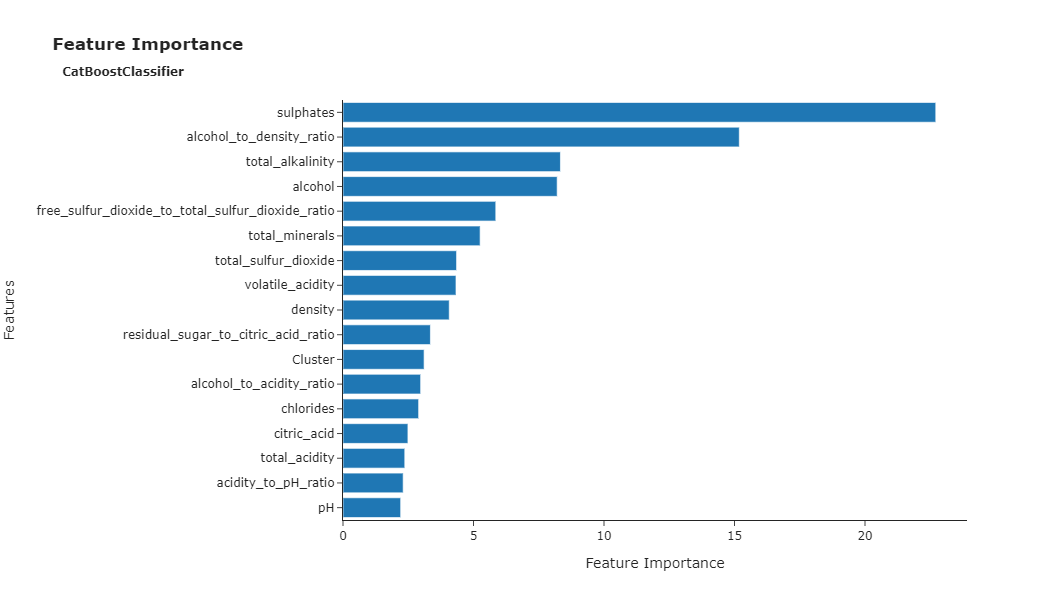

In [111]:
no_model_pipeline = Pipeline(pipeline.steps[:-1])
feat_names = X.copy()
feat_names = no_model_pipeline.fit_transform(feat_names)
feature_names = feat_names.columns
mean_feature_importance = np.mean(feature_importance, axis=0)

sorted_indices = np.argsort(mean_feature_importance)[::1]
mean_feature_importance = mean_feature_importance[sorted_indices]
feature_names = feature_names[sorted_indices]

fig = go.Figure()
fig.add_trace(go.Bar(x=mean_feature_importance,y=feature_names,orientation='h'))

fig.update_layout(
    title="<b>Feature Importance <br> <sub> CatBoostClassifier</sub></b>",
    xaxis=dict(title="Feature Importance"),
    yaxis=dict(title="Features"),
    showlegend=False,
    height=600,
    width=1000,
    margin=dict(t=100, l=80),
    template= plotly_template,
    coloraxis = dict(colorscale = 'magma')
)
fig.show()

> <p style="font-size: 20px"><b>📝 <code>sulphates</code> seems to be the most relevant feature for predicting wine quality. <br><br>
    📝 Features deriving from alcohol, such as <code>alcohol_to_density_ratio</code> and <code>total_alkalinity</code> also appear to have high relevance in predicting wine quality.</b></p>

<h1 id = 'predictions' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 38px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Testing the Pipeline</h1>

<p style="font-size: 20px">Now that our pipeline is completed, we can move on to predicting wine quality for the samples in the <code>test</code> data.</p>

In [86]:
test = pd.read_csv('/kaggle/input/playground-series-s3e5/test.csv')
test # Visualizing test data

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     2056            7.2             0.510         0.01             2.0   
1     2057            7.2             0.755         0.15             2.0   
2     2058            8.4             0.460         0.40             2.0   
3     2059            8.0             0.470         0.40             1.8   
4     2060            6.5             0.340         0.32             2.1   
...    ...            ...               ...          ...             ...   
1367  3423            8.8             0.745         0.18             2.7   
1368  3424           15.6             0.240         0.55             2.9   
1369  3425            7.3             0.760         0.00             2.2   
1370  3426            7.6             0.780         0.26             2.6   
1371  3427            8.8             0.780         0.22             3.0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.077                 31.0                  54.0  0.99748  3.39   
1         0.102                 14.0                  35.0  0.99586  3.33   
2         0.065                 21.0                  50.0  0.99774  3.08   
3         0.056                 14.0                  25.0  0.99480  3.30   
4         0.044                  8.0                  94.0  0.99356  3.23   
...         ...                  ...                   ...      ...   ...   
1367      0.084                 41.0                 115.0  0.99823  3.38   
1368      0.062                 11.0                  25.0  0.99724  2.99   
1369      0.095                  6.0                  19.0  0.99880  3.67   
1370      0.118                 17.0                 104.0  0.99616  3.30   
1371      0.085                 21.0                  43.0  0.99790  3.37   

      sulphates  alcohol  
0          0.59      9.8  
1          0.68     10.0  
2          0.65      9.5  
3          0.65     11.7  
4          0.48     12.8  
...         ...      ...  
1367       0.70      9.8  
1368       0.77     10.1  
1369       0.60      9.4  
1370       0.53      9.9  
1371       0.56     10.2  

[1372 rows x 12 columns]

In [88]:
# Saving ids
test_id = test['Id']
test_id

0       2056
1       2057
2       2058
3       2059
4       2060
        ... 
1367    3423
1368    3424
1369    3425
1370    3426
1371    3427
Name: Id, Length: 1372, dtype: int64

In [89]:
test = test.drop('Id', axis = 1) # Removing 'Id' feature
test

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.2             0.510         0.01             2.0      0.077   
1               7.2             0.755         0.15             2.0      0.102   
2               8.4             0.460         0.40             2.0      0.065   
3               8.0             0.470         0.40             1.8      0.056   
4               6.5             0.340         0.32             2.1      0.044   
...             ...               ...          ...             ...        ...   
1367            8.8             0.745         0.18             2.7      0.084   
1368           15.6             0.240         0.55             2.9      0.062   
1369            7.3             0.760         0.00             2.2      0.095   
1370            7.6             0.780         0.26             2.6      0.118   
1371            8.8             0.780         0.22             3.0      0.085   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    31.0                  54.0  0.99748  3.39       0.59   
1                    14.0                  35.0  0.99586  3.33       0.68   
2                    21.0                  50.0  0.99774  3.08       0.65   
3                    14.0                  25.0  0.99480  3.30       0.65   
4                     8.0                  94.0  0.99356  3.23       0.48   
...                   ...                   ...      ...   ...        ...   
1367                 41.0                 115.0  0.99823  3.38       0.70   
1368                 11.0                  25.0  0.99724  2.99       0.77   
1369                  6.0                  19.0  0.99880  3.67       0.60   
1370                 17.0                 104.0  0.99616  3.30       0.53   
1371                 21.0                  43.0  0.99790  3.37       0.56   

      alcohol  
0         9.8  
1        10.0  
2         9.5  
3        11.7  
4        12.8  
...       ...  
1367      9.8  
1368     10.1  
1369      9.4  
1370      9.9  
1371     10.2  

[1372 rows x 11 columns]

In [90]:
pipeline # Visualizing final pipeline

Pipeline(steps=[('Feature Engineering',
                 FunctionTransformer(func=<function feat_eng at 0x7864e46b37f0>)),
                ('Transforming Distribution', CustomQuantileTransformer()),
                ('Standard Scaler', CustomStandardScaler()),
                ('Clustering', KMeansTransformer()),
                ('Model',
                 <catboost.core.CatBoostClassifier object at 0x7864a9ee2e00>)])

In [91]:
# Predicting with the pipeline
y_pred = pipeline.predict(test)
y_pred # Visualizing predictions

array([[5],
       [6],
       [5],
       ...,
       [5],
       [5],
       [5]])

In [94]:
# Creating a submission dataframe
predictions = pd.DataFrame({
    'id': test_id,
    'quality': np.squeeze(y_pred)
})
predictions

id  quality
0     2056        5
1     2057        6
2     2058        5
3     2059        6
4     2060        5
...    ...      ...
1367  3423        5
1368  3424        7
1369  3425        5
1370  3426        5
1371  3427        5

[1372 rows x 2 columns]

In [96]:
predictions.to_csv('submission.csv', index = False) # submitting dataframe

<h1 id = 'deploy' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 38px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Deploying Pipeline</h1>

<p style="font-size: 20px">For the first time after completing a task on Kaggle, I've decided to save the pipeline with the aim of deploying my model. 
    <br><br>
I used the <code>joblib</code> library to save my pipeline in a .pkl file, as you can see below.</p>

In [115]:
import joblib

joblib.dump(pipeline, 'wine_quality_prediction.pkl')

['wine_quality_prediction.pkl']

<p style="font-size: 20px">Thanks to Hugging Face, I have been able to deploy this pipeline using <code>Streamlit</code>. <br><br>
You can test it by clicking on the link below to be redirected to the <b>Wine Quality Predictor</b> app on Hugging Face:
<br><br><br>
<a href = "https://huggingface.co/spaces/luisotorres/wine-quality-predictions">https://huggingface.co/spaces/luisotorres/wine-quality-predictions</a></p>

<h1 id = 'conclusion' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 38px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Conclusion</h1>

<p style='font-size: 20px'>In the study presented, we embarked on a comprehensive exploratory data analysis, aiming to extract as many insights as possible from the dataset. We succeeded in revealing relevant patterns among wines and identifying trends tied to their quality.
<br><br>
Additionally, we performed data preprocessing and examined a variety of machine learning algorithms, then fine-tuned the best ones to predict the quality of a wine based on its unique attributes.
<br><br>
Among the models evaluated, the CatBoost model, fine-tuned with Optuna, emerged as the most effective. This model achieved a Quadratic Weighted Kappa score of 0.5228 during cross-validation, demonstrating consistency with a lower standard deviation across folds.
<br><br>
For the first time, I've utilized tools such as Streamlit and Hugging Face to deploy this pipeline, culminating in the creation of an app. In this app, users can input the attributes of a wine and receive a prediction of its quality as determined by the model crafted in this notebook.
<br><br>
I hope you have found this experiment insightful. Please share your thoughts and feedback in the comments, and feel free to upvote if you found this work beneficial.
<br><br><br>
Thank you for reading.</p>

#### <hr style="border: 0; height: 1px; border-top: 0.85px solid #b2b2b2">
<div style="text-align: left; color: #8d8d8d; padding-left: 15px; font-size: 14.25px;">
    Luis Fernando Torres, 2023 <br><br>
    <a href="https://www.linkedin.com/in/luuisotorres/">LinkedIn</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="https://medium.com/@luuisotorres">Medium</a><br><br>
</div>